In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/gaurav/Desktop/Hinglish/data/data4.csv")

In [3]:
df[df['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity
70,15581,NaN,neutral
15978,4692,NaN,neutral


In [4]:
for i in range(len(df)):
    if(type(df['Tweet'][i]) !=str):
        df['Tweet'][i] = df['Sentiment Polarity'][i]

/Users/gaurav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
df[df['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity


In [6]:
df_valid = pd.read_csv("/Users/gaurav/Desktop/Hinglish/data/valid_data_cleaned4.csv")

In [7]:
df_valid[df_valid['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity
690,29711,NaN,neutral
2663,37114,NaN,neutral


In [8]:
for i in range(len(df_valid)):
    if(type(df_valid['Tweet'][i]) !=str):
        df_valid['Tweet'][i] = df_valid['Sentiment Polarity'][i]

/Users/gaurav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df_valid[df_valid['Tweet'].isnull()]

,ID,Tweet,Sentiment Polarity


In [10]:
df = df.append(df_valid, ignore_index=True)

In [11]:
df

,ID,Tweet,Sentiment Polarity
0,4330,vist bolest vztek smutek zmatek osam lost bezn...,neutral
1,41616,haan yaar neha pensiv pensiv karega post loudl...,neutral
2,6648,televis media congress liy nahi Ye aapko pata ...,negative
3,2512,all india nrc lagu kare kashmir dhara khatam k...,positive
4,610,pagal they real issu mandir import hindu khatr,neutral
5,14356,jeet dher sari subh kamnay modi asha karta jis...,positive
6,5840,topi wali bo new job hogi humey choti kesi mil...,negative
7,32791,Ye modi media walon maza hindu muslim debat karn,neutral
8,37480,baih tere itjey kya jalti pakistan chutiy khel...,negative
9,16395,hehe I come and actual someon shaadi star struck,neutral


# Word2Vec

In [12]:
from gensim.models import Word2Vec

In [13]:
tokenized_tweet = df['Tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = Word2Vec(tokenized_tweet, size=300,  window=5, min_count=1)
model_w2v.train(tokenized_tweet, total_examples= len(df['Tweet']), epochs=20)

(4525035, 4733420)

In [14]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:

        vec += model_w2v[word].reshape((1, size))
        count += 1.

    if count != 0:
        vec /= count
    return vec

In [15]:
import numpy as np
wordvec_arrays = np.zeros((len(tokenized_tweet), 300))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 300)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/Users/gaurav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(20000, 300)

In [16]:
len(model_w2v.wv.vocab)

27861

In [17]:
wordvec_arrays.shape

(20000, 300)

In [18]:
d = {}
d['negative'] = [1., 0., 0.]
d['neutral'] = [0., 1., 0.]
d['positive']  = [0., 0., 1.]

In [19]:
import numpy as np
out=[]
for i in df['Sentiment Polarity']:
    out.append(d[i])
out = np.array(out)

In [20]:
len(wordvec_arrays)

20000

In [21]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_valid, y_train, y_valid  = train_test_split(
        wordvec_arrays, 
        sentiment,
        train_size=0.85, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
print(len(X_train))
# print(len(X_test))
print(len(X_valid))

17000
3000


In [23]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_test, y_train, y_test  = train_test_split(
        X_train, 
        y_train,
        train_size=0.82352942, 
        shuffle = False
       )

In [24]:
print(len(X_train))
print(len(X_test))
print(len(X_valid))

14000
3000
3000


In [25]:
print((X_train.shape))
print((X_test.shape))
print((X_valid.shape))

(14000, 300)
(3000, 300)
(3000, 300)


In [26]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6473333333333333
F1-Score =  0.6505708985194985
[[670 202  28]
 [331 565 204]
 [ 49 244 707]]


In [35]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5036666666666667
F1-Score =  0.5082570211216728
[[480 304 116]
 [314 504 282]
 [ 98 375 527]]


In [28]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k/k_ex6-wv-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

<Figure size 1000x600 with 1 Axes>

Best K value =  99


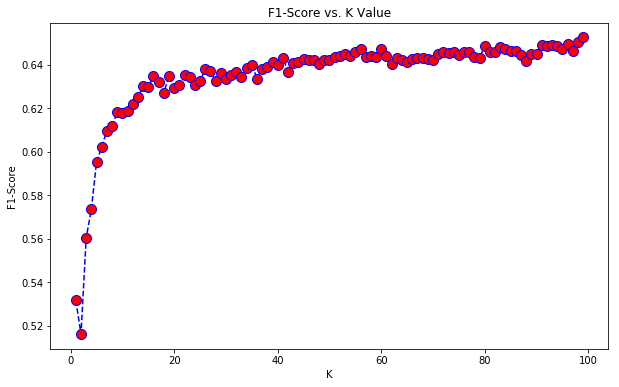

Best K value =  99


In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k/k_ex6-wv-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.6473333333333333
F1-Score =  0.6525135608703417
[[637 238  25]
 [303 613 184]
 [ 46 262 692]]


In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.589
F1-Score =  0.5734571450158678
[[791  70  39]
 [579 304 217]
 [122 206 672]]


In [32]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
y_pred = MNB.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

ValueError: Input X must be non-negative

In [33]:
diff = (max([max(i) for i in wordvec_arrays ]) - min([min(i) for i in wordvec_arrays ]))
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train+diff, y_train)
y_pred = MNB.predict(X_test+diff)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5966666666666667
F1-Score =  0.6001801896101346
[[447 414  39]
 [190 666 244]
 [ 26 297 677]]


In [36]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.656
F1-Score =  0.6597454798457952
[[648 220  32]
 [290 606 204]
 [ 51 235 714]]


In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

3.8663064161936442  minutes
Accuracy Score =  0.6563333333333333
F1-Score =  0.6619406600802474
[[591 279  30]
 [218 677 205]
 [ 33 266 701]]


In [38]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_valid, y_train, y_valid  = train_test_split(
        wordvec_arrays, 
        out,
        train_size=0.85, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [39]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_test, y_train, y_test  = train_test_split(
        X_train, 
        y_train,
        train_size=0.82352942, 
        shuffle = False
       )

In [40]:
print((X_train.shape))
print((X_test.shape))
print((X_valid.shape))

(14000, 300)
(3000, 300)
(3000, 300)


In [41]:
import matplotlib.pyplot as plt

def show_results(nn_model_train,s): # plot performance over the training epochs
  accuracy     = nn_model_train.history['accuracy']
  val_accuracy = nn_model_train.history['val_accuracy']
  loss         = nn_model_train.history['loss']
  val_loss     = nn_model_train.history['val_loss']
  epochs       = range(len(accuracy))
  nb_epochs    = len(epochs)

  f2 = plt.figure(2)
  plt.figure(figsize = (30,10))

  plt.subplot(2,1,1)
  plt.axis((0,nb_epochs,0.4,0.8))
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(2,1,2)
  plt.axis((0,nb_epochs,0.8,1.0))
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.savefig('/Users/gaurav/Desktop/Hinglish/data/EX-6'+s+'.png',bbox_inches='tight')
  plt.draw()
  plt.pause(0.001)


In [42]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

Using Theano backend.


In [43]:
batch_size  = 64
epochs      = 50
learning_rate = 0.0003

model = keras.Sequential()

nr_hidden = 300
nr_in     = 300
nr_out    = 3 
model.add(Dense(nr_in,activation='relu'))
model.add(Dense(nr_hidden, activation = 'relu'))
model.add(Dense(nr_hidden, activation = 'relu'))
model.add(Dense(nr_hidden-100, activation = 'relu'))
model.add(Dense(nr_hidden-100, activation = 'relu'))
model.add(Dense(nr_hidden-200, activation = 'relu'))
model.add(Dense(nr_hidden-200, activation = 'relu'))

model.add(Dense(nr_out,activation='softmax'))

opt = keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [44]:
X_train.shape

(14000, 300)

In [45]:
import time
start_time = time.time()
analysis = model.fit(X_train, y_train, batch_size=batch_size,epochs=1200,verbose=1,validation_data=(X_valid, y_valid))
trainTime = (time.time() - start_time)

Train on 14000 samples, validate on 3000 samples
Epoch 1/1200
14000/14000 [==============================] - 1s 74us/step - loss: 1.1100 - accuracy: 0.2934 - val_loss: 1.1054 - val_accuracy: 0.2973
Epoch 2/1200
14000/14000 [==============================] - 1s 49us/step - loss: 1.1059 - accuracy: 0.2951 - val_loss: 1.1018 - val_accuracy: 0.3073
Epoch 3/1200
14000/14000 [==============================] - 1s 51us/step - loss: 1.1023 - accuracy: 0.3128 - val_loss: 1.0987 - val_accuracy: 0.3400
Epoch 4/1200
14000/14000 [==============================] - 1s 51us/step - loss: 1.0990 - accuracy: 0.3535 - val_loss: 1.0958 - val_accuracy: 0.3853
Epoch 5/1200
14000/14000 [==============================] - 1s 50us/step - loss: 1.0959 - accuracy: 0.3881 - val_loss: 1.0932 - val_accuracy: 0.4087
Epoch 6/1200
14000/14000 [==============================] - 1s 48us/step - loss: 1.0932 - accuracy: 0.4084 - val_loss: 1.0908 - val_accuracy: 0.4183
Epoch 7/1200
14000/14000 [==============================]

14000/14000 [==============================] - 1s 49us/step - loss: 0.9035 - accuracy: 0.5723 - val_loss: 0.9078 - val_accuracy: 0.5627
Epoch 56/1200
14000/14000 [==============================] - 1s 49us/step - loss: 0.9004 - accuracy: 0.5739 - val_loss: 0.9048 - val_accuracy: 0.5650
Epoch 57/1200
14000/14000 [==============================] - 1s 48us/step - loss: 0.8975 - accuracy: 0.5751 - val_loss: 0.9020 - val_accuracy: 0.5650
Epoch 58/1200
14000/14000 [==============================] - 1s 48us/step - loss: 0.8948 - accuracy: 0.5761 - val_loss: 0.8994 - val_accuracy: 0.5660
Epoch 59/1200
14000/14000 [==============================] - 1s 49us/step - loss: 0.8923 - accuracy: 0.5764 - val_loss: 0.8969 - val_accuracy: 0.5683
Epoch 60/1200
14000/14000 [==============================] - 1s 49us/step - loss: 0.8899 - accuracy: 0.5769 - val_loss: 0.8945 - val_accuracy: 0.5693
Epoch 61/1200
14000/14000 [==============================] - 1s 48us/step - loss: 0.8877 - accuracy: 0.5773 - val_

14000/14000 [==============================] - 1s 54us/step - loss: 0.8529 - accuracy: 0.5969 - val_loss: 0.8599 - val_accuracy: 0.5933
Epoch 110/1200
14000/14000 [==============================] - 1s 52us/step - loss: 0.8526 - accuracy: 0.5976 - val_loss: 0.8596 - val_accuracy: 0.5927
Epoch 111/1200
14000/14000 [==============================] - 1s 50us/step - loss: 0.8524 - accuracy: 0.5981 - val_loss: 0.8596 - val_accuracy: 0.5927
Epoch 112/1200
14000/14000 [==============================] - 1s 50us/step - loss: 0.8522 - accuracy: 0.5976 - val_loss: 0.8592 - val_accuracy: 0.5923
Epoch 113/1200
14000/14000 [==============================] - 1s 48us/step - loss: 0.8519 - accuracy: 0.5994 - val_loss: 0.8595 - val_accuracy: 0.5940
Epoch 114/1200
14000/14000 [==============================] - 1s 57us/step - loss: 0.8518 - accuracy: 0.5986 - val_loss: 0.8591 - val_accuracy: 0.5947
Epoch 115/1200
14000/14000 [==============================] - 1s 49us/step - loss: 0.8515 - accuracy: 0.5979 

14000/14000 [==============================] - 1s 52us/step - loss: 0.8444 - accuracy: 0.6038 - val_loss: 0.8550 - val_accuracy: 0.5937
Epoch 164/1200
14000/14000 [==============================] - 1s 50us/step - loss: 0.8443 - accuracy: 0.6041 - val_loss: 0.8550 - val_accuracy: 0.5940
Epoch 165/1200
14000/14000 [==============================] - 1s 50us/step - loss: 0.8441 - accuracy: 0.6051 - val_loss: 0.8546 - val_accuracy: 0.5947
Epoch 166/1200
14000/14000 [==============================] - 1s 49us/step - loss: 0.8441 - accuracy: 0.6040 - val_loss: 0.8546 - val_accuracy: 0.5933
Epoch 167/1200
14000/14000 [==============================] - 1s 50us/step - loss: 0.8439 - accuracy: 0.6044 - val_loss: 0.8544 - val_accuracy: 0.5940
Epoch 168/1200
14000/14000 [==============================] - 1s 54us/step - loss: 0.8438 - accuracy: 0.6046 - val_loss: 0.8544 - val_accuracy: 0.5943
Epoch 169/1200
14000/14000 [==============================] - 1s 50us/step - loss: 0.8437 - accuracy: 0.6049 

14000/14000 [==============================] - 1s 53us/step - loss: 0.8388 - accuracy: 0.6079 - val_loss: 0.8515 - val_accuracy: 0.5980
Epoch 218/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.8387 - accuracy: 0.6080 - val_loss: 0.8516 - val_accuracy: 0.5957
Epoch 219/1200
14000/14000 [==============================] - 1s 52us/step - loss: 0.8386 - accuracy: 0.6074 - val_loss: 0.8515 - val_accuracy: 0.5967
Epoch 220/1200
14000/14000 [==============================] - 1s 58us/step - loss: 0.8384 - accuracy: 0.6066 - val_loss: 0.8515 - val_accuracy: 0.5963
Epoch 221/1200
14000/14000 [==============================] - 1s 57us/step - loss: 0.8384 - accuracy: 0.6077 - val_loss: 0.8516 - val_accuracy: 0.5950
Epoch 222/1200
14000/14000 [==============================] - 1s 56us/step - loss: 0.8383 - accuracy: 0.6080 - val_loss: 0.8512 - val_accuracy: 0.5963
Epoch 223/1200
14000/14000 [==============================] - 1s 54us/step - loss: 0.8383 - accuracy: 0.6083 

14000/14000 [==============================] - 1s 49us/step - loss: 0.8341 - accuracy: 0.6098 - val_loss: 0.8491 - val_accuracy: 0.5983
Epoch 272/1200
14000/14000 [==============================] - 1s 90us/step - loss: 0.8340 - accuracy: 0.6111 - val_loss: 0.8488 - val_accuracy: 0.5977
Epoch 273/1200
14000/14000 [==============================] - 1s 68us/step - loss: 0.8339 - accuracy: 0.6112 - val_loss: 0.8489 - val_accuracy: 0.5993
Epoch 274/1200
14000/14000 [==============================] - 1s 54us/step - loss: 0.8338 - accuracy: 0.6113 - val_loss: 0.8487 - val_accuracy: 0.5980
Epoch 275/1200
14000/14000 [==============================] - 1s 56us/step - loss: 0.8338 - accuracy: 0.6120 - val_loss: 0.8489 - val_accuracy: 0.5987
Epoch 276/1200
14000/14000 [==============================] - 1s 55us/step - loss: 0.8337 - accuracy: 0.6105 - val_loss: 0.8486 - val_accuracy: 0.5983
Epoch 277/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.8336 - accuracy: 0.6114 

14000/14000 [==============================] - 1s 57us/step - loss: 0.8301 - accuracy: 0.6136 - val_loss: 0.8472 - val_accuracy: 0.6007
Epoch 326/1200
14000/14000 [==============================] - 1s 58us/step - loss: 0.8299 - accuracy: 0.6149 - val_loss: 0.8470 - val_accuracy: 0.6030
Epoch 327/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.8298 - accuracy: 0.6144 - val_loss: 0.8474 - val_accuracy: 0.6013
Epoch 328/1200
14000/14000 [==============================] - 1s 58us/step - loss: 0.8298 - accuracy: 0.6145 - val_loss: 0.8470 - val_accuracy: 0.6030
Epoch 329/1200
14000/14000 [==============================] - 1s 55us/step - loss: 0.8297 - accuracy: 0.6141 - val_loss: 0.8468 - val_accuracy: 0.6027
Epoch 330/1200
14000/14000 [==============================] - 1s 62us/step - loss: 0.8297 - accuracy: 0.6146 - val_loss: 0.8468 - val_accuracy: 0.6013
Epoch 331/1200
14000/14000 [==============================] - 1s 68us/step - loss: 0.8297 - accuracy: 0.6131 

14000/14000 [==============================] - 1s 54us/step - loss: 0.8263 - accuracy: 0.6164 - val_loss: 0.8456 - val_accuracy: 0.6010
Epoch 380/1200
14000/14000 [==============================] - 1s 55us/step - loss: 0.8262 - accuracy: 0.6165 - val_loss: 0.8462 - val_accuracy: 0.6013
Epoch 381/1200
14000/14000 [==============================] - 1s 52us/step - loss: 0.8261 - accuracy: 0.6172 - val_loss: 0.8457 - val_accuracy: 0.6017
Epoch 382/1200
14000/14000 [==============================] - 1s 55us/step - loss: 0.8261 - accuracy: 0.6166 - val_loss: 0.8456 - val_accuracy: 0.6023
Epoch 383/1200
14000/14000 [==============================] - 1s 72us/step - loss: 0.8260 - accuracy: 0.6153 - val_loss: 0.8458 - val_accuracy: 0.6027
Epoch 384/1200
14000/14000 [==============================] - 1s 63us/step - loss: 0.8260 - accuracy: 0.6161 - val_loss: 0.8453 - val_accuracy: 0.6013
Epoch 385/1200
14000/14000 [==============================] - 1s 62us/step - loss: 0.8258 - accuracy: 0.6166 

14000/14000 [==============================] - 1s 64us/step - loss: 0.8227 - accuracy: 0.6208 - val_loss: 0.8446 - val_accuracy: 0.6020
Epoch 434/1200
14000/14000 [==============================] - 1s 57us/step - loss: 0.8227 - accuracy: 0.6186 - val_loss: 0.8443 - val_accuracy: 0.6007
Epoch 435/1200
14000/14000 [==============================] - 1s 58us/step - loss: 0.8226 - accuracy: 0.6189 - val_loss: 0.8443 - val_accuracy: 0.6030
Epoch 436/1200
14000/14000 [==============================] - 1s 54us/step - loss: 0.8224 - accuracy: 0.6196 - val_loss: 0.8444 - val_accuracy: 0.6040
Epoch 437/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.8224 - accuracy: 0.6188 - val_loss: 0.8446 - val_accuracy: 0.6027
Epoch 438/1200
14000/14000 [==============================] - 1s 57us/step - loss: 0.8224 - accuracy: 0.6194 - val_loss: 0.8441 - val_accuracy: 0.6020
Epoch 439/1200
14000/14000 [==============================] - 1s 57us/step - loss: 0.8223 - accuracy: 0.6194 

14000/14000 [==============================] - 1s 50us/step - loss: 0.8191 - accuracy: 0.6195 - val_loss: 0.8435 - val_accuracy: 0.6030
Epoch 488/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.8190 - accuracy: 0.6206 - val_loss: 0.8434 - val_accuracy: 0.6033
Epoch 489/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.8189 - accuracy: 0.6209 - val_loss: 0.8432 - val_accuracy: 0.6007
Epoch 490/1200
14000/14000 [==============================] - 1s 50us/step - loss: 0.8189 - accuracy: 0.6212 - val_loss: 0.8434 - val_accuracy: 0.6033
Epoch 491/1200
14000/14000 [==============================] - 1s 52us/step - loss: 0.8188 - accuracy: 0.6225 - val_loss: 0.8437 - val_accuracy: 0.6047
Epoch 492/1200
14000/14000 [==============================] - 1s 56us/step - loss: 0.8189 - accuracy: 0.6206 - val_loss: 0.8433 - val_accuracy: 0.6030
Epoch 493/1200
14000/14000 [==============================] - 1s 56us/step - loss: 0.8188 - accuracy: 0.6209 

14000/14000 [==============================] - 1s 56us/step - loss: 0.8155 - accuracy: 0.6226 - val_loss: 0.8424 - val_accuracy: 0.6013
Epoch 542/1200
14000/14000 [==============================] - 1s 60us/step - loss: 0.8154 - accuracy: 0.6239 - val_loss: 0.8426 - val_accuracy: 0.6027
Epoch 543/1200
14000/14000 [==============================] - 1s 52us/step - loss: 0.8153 - accuracy: 0.6234 - val_loss: 0.8425 - val_accuracy: 0.6040
Epoch 544/1200
14000/14000 [==============================] - 1s 57us/step - loss: 0.8153 - accuracy: 0.6239 - val_loss: 0.8426 - val_accuracy: 0.6003
Epoch 545/1200
14000/14000 [==============================] - 1s 56us/step - loss: 0.8152 - accuracy: 0.6230 - val_loss: 0.8427 - val_accuracy: 0.6027
Epoch 546/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.8151 - accuracy: 0.6249 - val_loss: 0.8428 - val_accuracy: 0.6013
Epoch 547/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.8150 - accuracy: 0.6238 

14000/14000 [==============================] - 1s 51us/step - loss: 0.8116 - accuracy: 0.6270 - val_loss: 0.8427 - val_accuracy: 0.5990
Epoch 596/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.8115 - accuracy: 0.6265 - val_loss: 0.8418 - val_accuracy: 0.5997
Epoch 597/1200
14000/14000 [==============================] - 1s 52us/step - loss: 0.8115 - accuracy: 0.6276 - val_loss: 0.8419 - val_accuracy: 0.5997
Epoch 598/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.8115 - accuracy: 0.6275 - val_loss: 0.8419 - val_accuracy: 0.5983
Epoch 599/1200
14000/14000 [==============================] - 1s 63us/step - loss: 0.8113 - accuracy: 0.6266 - val_loss: 0.8418 - val_accuracy: 0.6013
Epoch 600/1200
14000/14000 [==============================] - 1s 59us/step - loss: 0.8112 - accuracy: 0.6272 - val_loss: 0.8423 - val_accuracy: 0.6017
Epoch 601/1200
14000/14000 [==============================] - 1s 56us/step - loss: 0.8112 - accuracy: 0.6273 

14000/14000 [==============================] - 1s 54us/step - loss: 0.8076 - accuracy: 0.6296 - val_loss: 0.8414 - val_accuracy: 0.6010
Epoch 650/1200
14000/14000 [==============================] - 1s 56us/step - loss: 0.8076 - accuracy: 0.6305 - val_loss: 0.8415 - val_accuracy: 0.6013
Epoch 651/1200
14000/14000 [==============================] - 1s 56us/step - loss: 0.8074 - accuracy: 0.6298 - val_loss: 0.8415 - val_accuracy: 0.5977
Epoch 652/1200
14000/14000 [==============================] - 1s 54us/step - loss: 0.8073 - accuracy: 0.6292 - val_loss: 0.8416 - val_accuracy: 0.6000
Epoch 653/1200
14000/14000 [==============================] - 1s 56us/step - loss: 0.8073 - accuracy: 0.6300 - val_loss: 0.8414 - val_accuracy: 0.6033
Epoch 654/1200
14000/14000 [==============================] - 1s 56us/step - loss: 0.8071 - accuracy: 0.6305 - val_loss: 0.8416 - val_accuracy: 0.5987
Epoch 655/1200
14000/14000 [==============================] - 1s 54us/step - loss: 0.8071 - accuracy: 0.6299 

14000/14000 [==============================] - 1s 58us/step - loss: 0.8031 - accuracy: 0.6333 - val_loss: 0.8418 - val_accuracy: 0.5983
Epoch 704/1200
14000/14000 [==============================] - 1s 53us/step - loss: 0.8031 - accuracy: 0.6331 - val_loss: 0.8410 - val_accuracy: 0.5997
Epoch 705/1200
14000/14000 [==============================] - 1s 55us/step - loss: 0.8031 - accuracy: 0.6332 - val_loss: 0.8409 - val_accuracy: 0.6000
Epoch 706/1200
14000/14000 [==============================] - 1s 54us/step - loss: 0.8029 - accuracy: 0.6333 - val_loss: 0.8412 - val_accuracy: 0.5993
Epoch 707/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.8028 - accuracy: 0.6334 - val_loss: 0.8410 - val_accuracy: 0.5997
Epoch 708/1200
14000/14000 [==============================] - 1s 55us/step - loss: 0.8028 - accuracy: 0.6338 - val_loss: 0.8410 - val_accuracy: 0.6007
Epoch 709/1200
14000/14000 [==============================] - 1s 55us/step - loss: 0.8027 - accuracy: 0.6333 

14000/14000 [==============================] - 1s 51us/step - loss: 0.7984 - accuracy: 0.6373 - val_loss: 0.8417 - val_accuracy: 0.5977
Epoch 758/1200
14000/14000 [==============================] - 1s 52us/step - loss: 0.7981 - accuracy: 0.6377 - val_loss: 0.8418 - val_accuracy: 0.5980
Epoch 759/1200
14000/14000 [==============================] - 1s 53us/step - loss: 0.7981 - accuracy: 0.6371 - val_loss: 0.8414 - val_accuracy: 0.6010
Epoch 760/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.7982 - accuracy: 0.6399 - val_loss: 0.8414 - val_accuracy: 0.5960
Epoch 761/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.7980 - accuracy: 0.6360 - val_loss: 0.8412 - val_accuracy: 0.5977
Epoch 762/1200
14000/14000 [==============================] - 1s 52us/step - loss: 0.7980 - accuracy: 0.6380 - val_loss: 0.8411 - val_accuracy: 0.5977
Epoch 763/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.7979 - accuracy: 0.6379 

14000/14000 [==============================] - 1s 51us/step - loss: 0.7931 - accuracy: 0.6409 - val_loss: 0.8415 - val_accuracy: 0.5993
Epoch 812/1200
14000/14000 [==============================] - 1s 53us/step - loss: 0.7929 - accuracy: 0.6415 - val_loss: 0.8414 - val_accuracy: 0.5993
Epoch 813/1200
14000/14000 [==============================] - 1s 52us/step - loss: 0.7926 - accuracy: 0.6413 - val_loss: 0.8414 - val_accuracy: 0.5983
Epoch 814/1200
14000/14000 [==============================] - 1s 50us/step - loss: 0.7926 - accuracy: 0.6401 - val_loss: 0.8414 - val_accuracy: 0.5987
Epoch 815/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.7924 - accuracy: 0.6418 - val_loss: 0.8425 - val_accuracy: 0.5980
Epoch 816/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.7924 - accuracy: 0.6416 - val_loss: 0.8421 - val_accuracy: 0.5990
Epoch 817/1200
14000/14000 [==============================] - 1s 51us/step - loss: 0.7922 - accuracy: 0.6406 

14000/14000 [==============================] - 1s 58us/step - loss: 0.7867 - accuracy: 0.6436 - val_loss: 0.8430 - val_accuracy: 0.5953
Epoch 866/1200
14000/14000 [==============================] - 1s 59us/step - loss: 0.7865 - accuracy: 0.6443 - val_loss: 0.8433 - val_accuracy: 0.5973
Epoch 867/1200
14000/14000 [==============================] - 1s 55us/step - loss: 0.7864 - accuracy: 0.6458 - val_loss: 0.8424 - val_accuracy: 0.5970
Epoch 868/1200
14000/14000 [==============================] - 1s 62us/step - loss: 0.7862 - accuracy: 0.6447 - val_loss: 0.8446 - val_accuracy: 0.5970
Epoch 869/1200
14000/14000 [==============================] - 1s 63us/step - loss: 0.7862 - accuracy: 0.6460 - val_loss: 0.8430 - val_accuracy: 0.5983
Epoch 870/1200
14000/14000 [==============================] - 1s 63us/step - loss: 0.7861 - accuracy: 0.6456 - val_loss: 0.8425 - val_accuracy: 0.5960
Epoch 871/1200
14000/14000 [==============================] - 1s 65us/step - loss: 0.7859 - accuracy: 0.6439 

14000/14000 [==============================] - 1s 61us/step - loss: 0.7795 - accuracy: 0.6491 - val_loss: 0.8439 - val_accuracy: 0.5983
Epoch 920/1200
14000/14000 [==============================] - 1s 62us/step - loss: 0.7791 - accuracy: 0.6500 - val_loss: 0.8451 - val_accuracy: 0.5957
Epoch 921/1200
14000/14000 [==============================] - 1s 53us/step - loss: 0.7790 - accuracy: 0.6488 - val_loss: 0.8443 - val_accuracy: 0.5970
Epoch 922/1200
14000/14000 [==============================] - 1s 53us/step - loss: 0.7789 - accuracy: 0.6489 - val_loss: 0.8440 - val_accuracy: 0.5980
Epoch 923/1200
14000/14000 [==============================] - 1s 65us/step - loss: 0.7784 - accuracy: 0.6506 - val_loss: 0.8439 - val_accuracy: 0.5967
Epoch 924/1200
14000/14000 [==============================] - 1s 56us/step - loss: 0.7787 - accuracy: 0.6509 - val_loss: 0.8440 - val_accuracy: 0.5973
Epoch 925/1200
14000/14000 [==============================] - 1s 58us/step - loss: 0.7785 - accuracy: 0.6499 

14000/14000 [==============================] - 1s 94us/step - loss: 0.7708 - accuracy: 0.6538 - val_loss: 0.8470 - val_accuracy: 0.5967
Epoch 974/1200
14000/14000 [==============================] - 1s 91us/step - loss: 0.7705 - accuracy: 0.6546 - val_loss: 0.8466 - val_accuracy: 0.5943
Epoch 975/1200
14000/14000 [==============================] - 1s 88us/step - loss: 0.7706 - accuracy: 0.6554 - val_loss: 0.8484 - val_accuracy: 0.5973
Epoch 976/1200
14000/14000 [==============================] - 1s 79us/step - loss: 0.7701 - accuracy: 0.6567 - val_loss: 0.8484 - val_accuracy: 0.5970
Epoch 977/1200
14000/14000 [==============================] - 1s 73us/step - loss: 0.7701 - accuracy: 0.6538 - val_loss: 0.8494 - val_accuracy: 0.5967
Epoch 978/1200
14000/14000 [==============================] - 1s 77us/step - loss: 0.7696 - accuracy: 0.6546 - val_loss: 0.8486 - val_accuracy: 0.5980
Epoch 979/1200
14000/14000 [==============================] - 1s 71us/step - loss: 0.7693 - accuracy: 0.6546 

14000/14000 [==============================] - 1s 63us/step - loss: 0.7602 - accuracy: 0.6616 - val_loss: 0.8506 - val_accuracy: 0.5973
Epoch 1028/1200
14000/14000 [==============================] - 1s 73us/step - loss: 0.7600 - accuracy: 0.6610 - val_loss: 0.8516 - val_accuracy: 0.5957
Epoch 1029/1200
14000/14000 [==============================] - 1s 66us/step - loss: 0.7600 - accuracy: 0.6613 - val_loss: 0.8523 - val_accuracy: 0.5950
Epoch 1030/1200
14000/14000 [==============================] - 1s 68us/step - loss: 0.7599 - accuracy: 0.6630 - val_loss: 0.8509 - val_accuracy: 0.5953
Epoch 1031/1200
14000/14000 [==============================] - 1s 71us/step - loss: 0.7594 - accuracy: 0.6606 - val_loss: 0.8553 - val_accuracy: 0.5937
Epoch 1032/1200
14000/14000 [==============================] - 1s 59us/step - loss: 0.7594 - accuracy: 0.6615 - val_loss: 0.8516 - val_accuracy: 0.5953
Epoch 1033/1200
14000/14000 [==============================] - 1s 61us/step - loss: 0.7592 - accuracy: 0

Epoch 1081/1200
14000/14000 [==============================] - 4s 265us/step - loss: 0.7483 - accuracy: 0.6686 - val_loss: 0.8577 - val_accuracy: 0.5907
Epoch 1082/1200
14000/14000 [==============================] - 3s 189us/step - loss: 0.7480 - accuracy: 0.6665 - val_loss: 0.8574 - val_accuracy: 0.5930
Epoch 1083/1200
14000/14000 [==============================] - 1s 104us/step - loss: 0.7478 - accuracy: 0.6696 - val_loss: 0.8573 - val_accuracy: 0.5957
Epoch 1084/1200
14000/14000 [==============================] - 1s 58us/step - loss: 0.7476 - accuracy: 0.6692 - val_loss: 0.8567 - val_accuracy: 0.5920
Epoch 1085/1200
14000/14000 [==============================] - 1s 59us/step - loss: 0.7470 - accuracy: 0.6674 - val_loss: 0.8567 - val_accuracy: 0.5970
Epoch 1086/1200
14000/14000 [==============================] - 1s 55us/step - loss: 0.7471 - accuracy: 0.6688 - val_loss: 0.8575 - val_accuracy: 0.5927
Epoch 1087/1200
14000/14000 [==============================] - 1s 59us/step - loss: 0

Epoch 1135/1200
14000/14000 [==============================] - 1s 59us/step - loss: 0.7341 - accuracy: 0.6759 - val_loss: 0.8651 - val_accuracy: 0.5917
Epoch 1136/1200
14000/14000 [==============================] - 1s 53us/step - loss: 0.7340 - accuracy: 0.6748 - val_loss: 0.8656 - val_accuracy: 0.5900
Epoch 1137/1200
14000/14000 [==============================] - 1s 53us/step - loss: 0.7334 - accuracy: 0.6771 - val_loss: 0.8653 - val_accuracy: 0.5880
Epoch 1138/1200
14000/14000 [==============================] - 1s 54us/step - loss: 0.7329 - accuracy: 0.6764 - val_loss: 0.8656 - val_accuracy: 0.5910
Epoch 1139/1200
14000/14000 [==============================] - 1s 65us/step - loss: 0.7329 - accuracy: 0.6781 - val_loss: 0.8661 - val_accuracy: 0.5907
Epoch 1140/1200
14000/14000 [==============================] - 1s 84us/step - loss: 0.7328 - accuracy: 0.6776 - val_loss: 0.8656 - val_accuracy: 0.5913
Epoch 1141/1200
14000/14000 [==============================] - 1s 61us/step - loss: 0.73

14000/14000 [==============================] - 1s 55us/step - loss: 0.7179 - accuracy: 0.6841 - val_loss: 0.8750 - val_accuracy: 0.5903
Epoch 1189/1200
14000/14000 [==============================] - 1s 93us/step - loss: 0.7172 - accuracy: 0.6861 - val_loss: 0.8757 - val_accuracy: 0.5887
Epoch 1190/1200
14000/14000 [==============================] - 3s 193us/step - loss: 0.7172 - accuracy: 0.6836 - val_loss: 0.8762 - val_accuracy: 0.5940
Epoch 1191/1200
14000/14000 [==============================] - 1s 81us/step - loss: 0.7163 - accuracy: 0.6879 - val_loss: 0.8801 - val_accuracy: 0.5867
Epoch 1192/1200
14000/14000 [==============================] - 1s 61us/step - loss: 0.7155 - accuracy: 0.6867 - val_loss: 0.8758 - val_accuracy: 0.5903
Epoch 1193/1200
14000/14000 [==============================] - 1s 58us/step - loss: 0.7158 - accuracy: 0.6863 - val_loss: 0.8785 - val_accuracy: 0.5900
Epoch 1194/1200
14000/14000 [==============================] - 1s 59us/step - loss: 0.7153 - accuracy: 

In [46]:
print(trainTime/60, " minutes")

16.367565580209096  minutes


In [47]:
test_eval = model.evaluate(X_test, y_test, verbose=0)

In [48]:
print('Test loss:', test_eval[0])      # this is the categorical_crossentropy
print('Test accuracy:', test_eval[1])

Test loss: 0.7690514006614685
Test accuracy: 0.6389999985694885


In [49]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1) # Choose the prediction with the highest probability


In [50]:
from keras.utils import to_categorical

y_pred_one_hot = to_categorical(y_pred)


In [51]:
print("F1-Score = ", f1_score(y_test, y_pred_one_hot, average='macro'))

F1-Score =  0.6100863922483809


<Figure size 432x288 with 0 Axes>

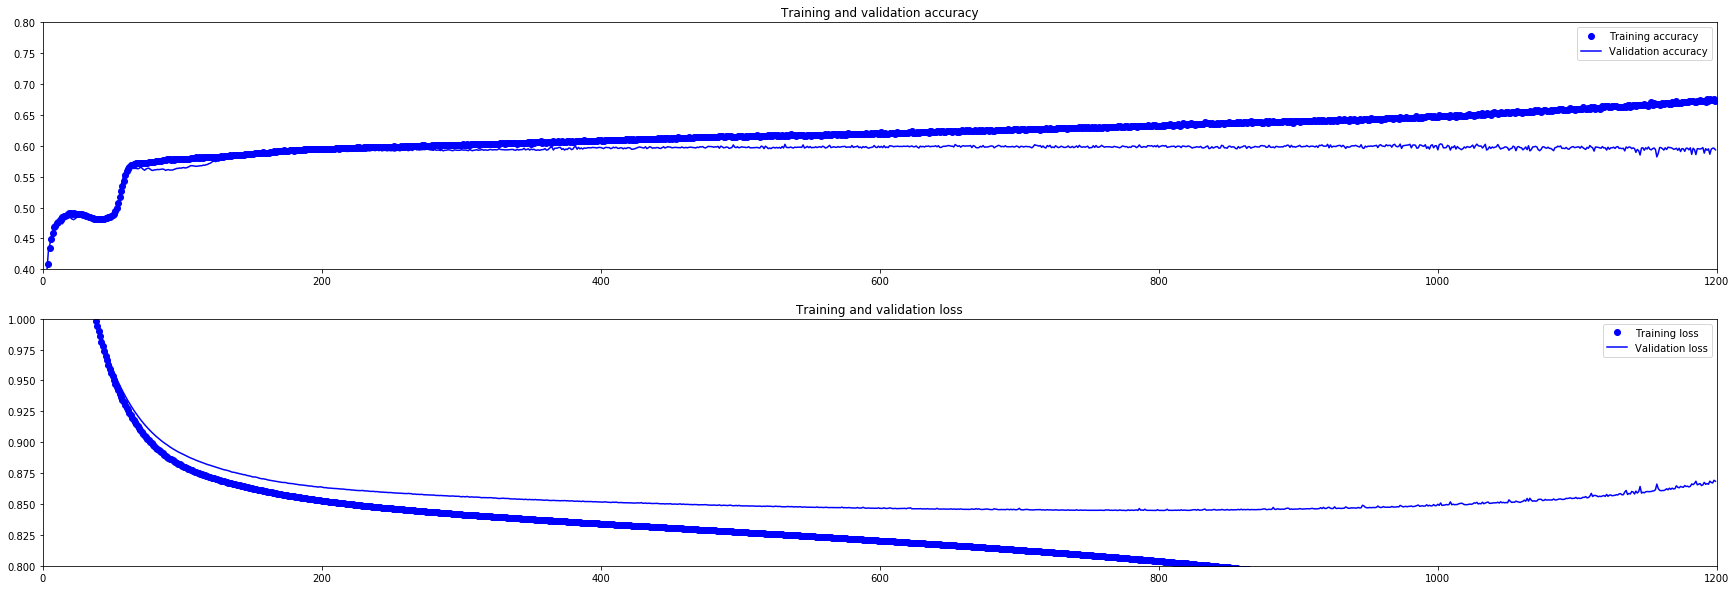

In [542]:
show_results(analysis,"W2V_MLP_1200_2")

In [52]:
batch_size  = 64
epochs      = 10
learning_rate = 0.0003
model = Sequential()

model.add(Conv1D(16, kernel_size=(3),activation='relu',padding='same'))
model.add(MaxPooling1D((4),padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(8, kernel_size=(3),activation='relu',padding='same'))
model.add(MaxPooling1D((2 ),padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

# model.summary()

opt = keras.optimizers.RMSprop(lr=learning_rate)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [53]:
X_train.shape

(14000, 300)

In [54]:
X_train = np.expand_dims(X_train, axis=2)

In [55]:
X_train.shape

(14000, 300, 1)

In [56]:
X_valid.shape

(3000, 300)

In [57]:
X_valid = np.expand_dims(X_valid, axis=2)

In [58]:
X_valid.shape

(3000, 300, 1)

In [59]:
import time
start_time = time.time()
analysis = model.fit(X_train, y_train, batch_size=batch_size,epochs=100,verbose=1,validation_data=(X_valid, y_valid))
trainTime = (time.time() - start_time)

Train on 14000 samples, validate on 3000 samples
Epoch 1/100
14000/14000 [==============================] - 5s 333us/step - loss: 0.9631 - accuracy: 0.5178 - val_loss: 0.8880 - val_accuracy: 0.5750
Epoch 2/100
14000/14000 [==============================] - 5s 335us/step - loss: 0.8907 - accuracy: 0.5699 - val_loss: 0.8701 - val_accuracy: 0.5817
Epoch 3/100
14000/14000 [==============================] - 5s 369us/step - loss: 0.8810 - accuracy: 0.5798 - val_loss: 0.8757 - val_accuracy: 0.5777
Epoch 4/100
14000/14000 [==============================] - 4s 301us/step - loss: 0.8740 - accuracy: 0.5836 - val_loss: 0.8611 - val_accuracy: 0.5947
Epoch 5/100
14000/14000 [==============================] - 4s 303us/step - loss: 0.8709 - accuracy: 0.5826 - val_loss: 0.8706 - val_accuracy: 0.5833
Epoch 6/100
14000/14000 [==============================] - 4s 301us/step - loss: 0.8681 - accuracy: 0.5894 - val_loss: 0.8654 - val_accuracy: 0.5790
Epoch 7/100
14000/14000 [==============================] 

14000/14000 [==============================] - 8s 557us/step - loss: 0.8305 - accuracy: 0.6098 - val_loss: 0.8429 - val_accuracy: 0.6010
Epoch 56/100
14000/14000 [==============================] - 4s 319us/step - loss: 0.8300 - accuracy: 0.6071 - val_loss: 0.8419 - val_accuracy: 0.6017
Epoch 57/100
14000/14000 [==============================] - 4s 302us/step - loss: 0.8284 - accuracy: 0.6082 - val_loss: 0.8440 - val_accuracy: 0.6020
Epoch 58/100
14000/14000 [==============================] - 5s 337us/step - loss: 0.8300 - accuracy: 0.6088 - val_loss: 0.8459 - val_accuracy: 0.5953
Epoch 59/100
14000/14000 [==============================] - 5s 357us/step - loss: 0.8300 - accuracy: 0.6138 - val_loss: 0.8425 - val_accuracy: 0.6007
Epoch 60/100
14000/14000 [==============================] - 4s 305us/step - loss: 0.8293 - accuracy: 0.6139 - val_loss: 0.8437 - val_accuracy: 0.5990
Epoch 61/100
14000/14000 [==============================] - 5s 330us/step - loss: 0.8244 - accuracy: 0.6138 - val

In [60]:
print(trainTime/60, " minutes")

8.014245581626891  minutes


In [61]:
X_test = np.expand_dims(X_test, axis=2)

In [62]:
test_eval = model.evaluate(X_test, y_test, verbose=0)

In [63]:
print('Test loss:', test_eval[0])      # this is the categorical_crossentropy
print('Test accuracy:', test_eval[1])

Test loss: 0.7632112565040589
Test accuracy: 0.6589999794960022


In [64]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1) # Choose the prediction with the highest probability
y_pred_one_hot = to_categorical(y_pred)
print("F1-Score = ", f1_score(y_test, y_pred_one_hot, average='macro'))

F1-Score =  0.5969507158631687


<Figure size 432x288 with 0 Axes>

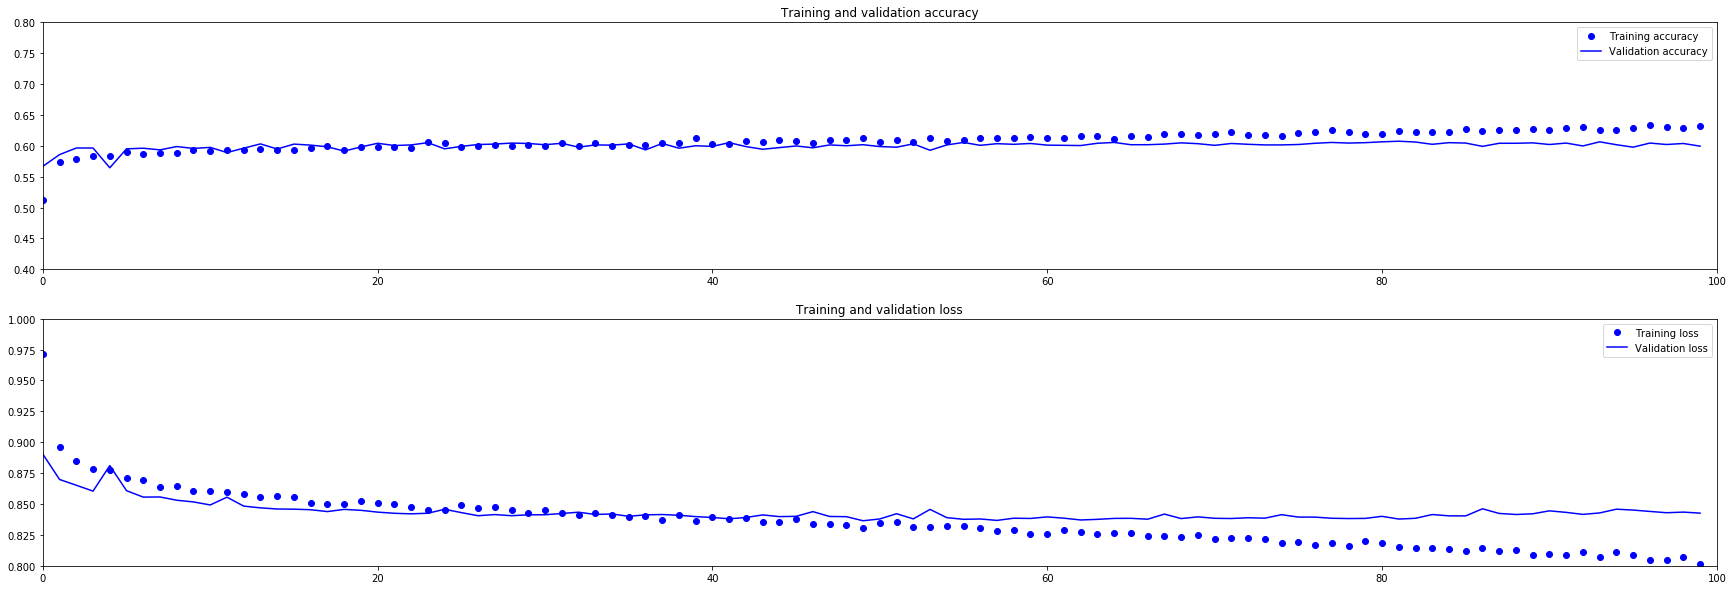

In [591]:
show_results(analysis,"W2V_CNN_100_3")

# Fast Text

In [71]:
from gensim.models import FastText

In [72]:
print("Training a Gensim FastText model")
model = FastText(sentences=tokenized_tweet, size = 200, window = 5) 
print("Training complete")

Training a Gensim FastText model
Training complete


In [75]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:

        vec += model[word].reshape((1, size))
        count += 1.

    if count != 0:
        vec /= count
    return vec

In [76]:
fasttext_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    fasttext_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
fasttext_df = pd.DataFrame(fasttext_arrays)
fasttext_df.shape

/Users/gaurav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(20000, 200)

In [77]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_valid, y_train, y_valid  = train_test_split(
        fasttext_arrays, 
        sentiment,
        train_size=0.85, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [78]:
print(len(X_train))
# print(len(X_test))
print(len(X_valid))

17000
3000


In [79]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_test, y_train, y_test  = train_test_split(
        X_train, 
        y_train,
        train_size=0.82352942, 
        shuffle = False
       )

In [80]:
print(len(X_train))
print(len(X_test))
print(len(X_valid))

14000
3000
3000


In [81]:
print((X_train.shape))
print((X_test.shape))
print((X_valid.shape))

(14000, 200)
(3000, 200)
(3000, 200)


In [82]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5816666666666667
F1-Score =  0.5651131631800275
[[723 118  59]
 [507 295 298]
 [109 164 727]]


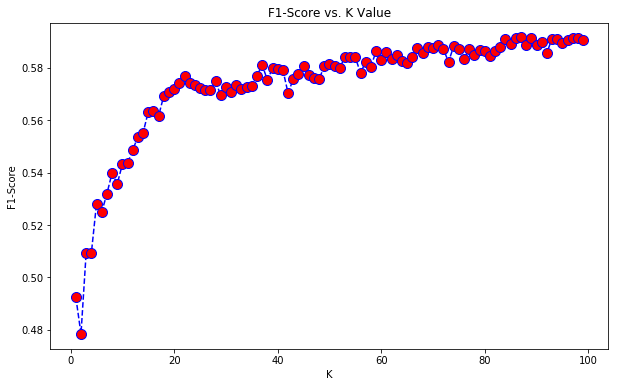

Best K value =  87


In [83]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k/k_ex6-fasttext-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=87)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.592
F1-Score =  0.5914976136177522
[[629 218  53]
 [385 449 266]
 [ 80 222 698]]


In [85]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.459
F1-Score =  0.462135374420752
[[415 347 138]
 [334 440 326]
 [125 353 522]]


In [86]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5393333333333333
F1-Score =  0.498848539556677
[[802  43  55]
 [682 145 273]
 [202 127 671]]


In [87]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
y_pred = MNB.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

ValueError: Input X must be non-negative

In [88]:
diff = (max([max(i) for i in wordvec_arrays ]) - min([min(i) for i in wordvec_arrays ]))
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train+diff, y_train)
y_pred = MNB.predict(X_test+diff)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.47733333333333333
F1-Score =  0.43558116889685344
[[123 736  41]
 [ 73 811 216]
 [  8 494 498]]


In [89]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.5776666666666667
F1-Score =  0.5645962968637664
[[676 152  72]
 [452 319 329]
 [ 97 165 738]]


In [90]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

2.856989351908366  minutes
Accuracy Score =  0.588
F1-Score =  0.5919501829469992
[[564 279  57]
 [311 532 257]
 [ 63 269 668]]


In [91]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_valid, y_train, y_valid  = train_test_split(
        fasttext_arrays, 
        out,
        train_size=0.85, 
        shuffle = False
       )

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [92]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_test, y_train, y_test  = train_test_split(
        X_train, 
        y_train,
        train_size=0.82352942, 
        shuffle = False
       )

In [93]:
print((X_train.shape))
print((X_test.shape))
print((X_valid.shape))

(14000, 200)
(3000, 200)
(3000, 200)


In [94]:
import matplotlib.pyplot as plt

def show_results(nn_model_train,s): # plot performance over the training epochs
  accuracy     = nn_model_train.history['accuracy']
  val_accuracy = nn_model_train.history['val_accuracy']
  loss         = nn_model_train.history['loss']
  val_loss     = nn_model_train.history['val_loss']
  epochs       = range(len(accuracy))
  nb_epochs    = len(epochs)

  f2 = plt.figure(2)
  plt.figure(figsize = (30,10))

  plt.subplot(2,1,1)
  plt.axis((0,nb_epochs,0.4,0.8))
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(2,1,2)
  plt.axis((0,nb_epochs,0.8,1.0))
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.savefig('/Users/gaurav/Desktop/Hinglish/data/EX-6/'+s+'.png',bbox_inches='tight')
  plt.draw()
  plt.pause(0.001)


In [95]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

In [96]:
batch_size  = 64
epochs      = 50
learning_rate = 0.0003

model = keras.Sequential()
 
nr_hidden = 200
nr_in     = 200
nr_out    = 3 
model.add(Dense(nr_in,activation='relu'))
model.add(Dense(nr_hidden, activation = 'relu'))
model.add(Dense(nr_hidden, activation = 'relu'))
model.add(Dense(nr_hidden-100, activation = 'relu'))
model.add(Dense(nr_hidden-100, activation = 'relu'))
model.add(Dense(nr_hidden-150, activation = 'relu'))
model.add(Dense(nr_hidden-150, activation = 'relu'))

model.add(Dense(nr_out,activation='softmax'))

opt = keras.optimizers.SGD(lr=learning_rate)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [97]:
X_train.shape

(14000, 200)

In [98]:
import time
start_time = time.time()
analysis = model.fit(X_train, y_train, batch_size=batch_size,epochs=5500,verbose=1,validation_data=(X_valid, y_valid))
trainTime = (time.time() - start_time)

Train on 14000 samples, validate on 3000 samples
Epoch 1/5500
14000/14000 [==============================] - 0s 27us/step - loss: 1.0911 - accuracy: 0.3310 - val_loss: 1.0908 - val_accuracy: 0.3273
Epoch 2/5500
14000/14000 [==============================] - 0s 34us/step - loss: 1.0861 - accuracy: 0.3310 - val_loss: 1.0864 - val_accuracy: 0.3277
Epoch 3/5500
14000/14000 [==============================] - 0s 27us/step - loss: 1.0817 - accuracy: 0.3310 - val_loss: 1.0824 - val_accuracy: 0.3277
Epoch 4/5500
14000/14000 [==============================] - 1s 38us/step - loss: 1.0776 - accuracy: 0.3311 - val_loss: 1.0785 - val_accuracy: 0.3283
Epoch 5/5500
14000/14000 [==============================] - 0s 26us/step - loss: 1.0735 - accuracy: 0.3318 - val_loss: 1.0745 - val_accuracy: 0.3327
Epoch 6/5500
14000/14000 [==============================] - 0s 36us/step - loss: 1.0695 - accuracy: 0.3560 - val_loss: 1.0708 - val_accuracy: 0.4160
Epoch 7/5500
14000/14000 [==============================]

14000/14000 [==============================] - 0s 25us/step - loss: 0.9508 - accuracy: 0.5340 - val_loss: 0.9608 - val_accuracy: 0.5260
Epoch 56/5500
14000/14000 [==============================] - 0s 29us/step - loss: 0.9497 - accuracy: 0.5344 - val_loss: 0.9597 - val_accuracy: 0.5263
Epoch 57/5500
14000/14000 [==============================] - 0s 28us/step - loss: 0.9486 - accuracy: 0.5354 - val_loss: 0.9587 - val_accuracy: 0.5270
Epoch 58/5500
14000/14000 [==============================] - 0s 31us/step - loss: 0.9475 - accuracy: 0.5348 - val_loss: 0.9577 - val_accuracy: 0.5273
Epoch 59/5500
14000/14000 [==============================] - 0s 26us/step - loss: 0.9464 - accuracy: 0.5351 - val_loss: 0.9567 - val_accuracy: 0.5273
Epoch 60/5500
14000/14000 [==============================] - 0s 26us/step - loss: 0.9454 - accuracy: 0.5348 - val_loss: 0.9558 - val_accuracy: 0.5267
Epoch 61/5500
14000/14000 [==============================] - 0s 31us/step - loss: 0.9444 - accuracy: 0.5346 - val_

14000/14000 [==============================] - 0s 23us/step - loss: 0.9217 - accuracy: 0.5412 - val_loss: 0.9350 - val_accuracy: 0.5330
Epoch 110/5500
14000/14000 [==============================] - 0s 28us/step - loss: 0.9215 - accuracy: 0.5420 - val_loss: 0.9352 - val_accuracy: 0.5347
Epoch 111/5500
14000/14000 [==============================] - 0s 31us/step - loss: 0.9214 - accuracy: 0.5409 - val_loss: 0.9348 - val_accuracy: 0.5340
Epoch 112/5500
14000/14000 [==============================] - 0s 28us/step - loss: 0.9212 - accuracy: 0.5410 - val_loss: 0.9344 - val_accuracy: 0.5343
Epoch 113/5500
14000/14000 [==============================] - 0s 30us/step - loss: 0.9210 - accuracy: 0.5424 - val_loss: 0.9344 - val_accuracy: 0.5337
Epoch 114/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.9208 - accuracy: 0.5422 - val_loss: 0.9342 - val_accuracy: 0.5337
Epoch 115/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9207 - accuracy: 0.5423 

14000/14000 [==============================] - 0s 23us/step - loss: 0.9160 - accuracy: 0.5449 - val_loss: 0.9297 - val_accuracy: 0.5353
Epoch 164/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9159 - accuracy: 0.5454 - val_loss: 0.9296 - val_accuracy: 0.5337
Epoch 165/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9159 - accuracy: 0.5445 - val_loss: 0.9293 - val_accuracy: 0.5317
Epoch 166/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.9158 - accuracy: 0.5458 - val_loss: 0.9293 - val_accuracy: 0.5333
Epoch 167/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9157 - accuracy: 0.5462 - val_loss: 0.9302 - val_accuracy: 0.5333
Epoch 168/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9157 - accuracy: 0.5453 - val_loss: 0.9296 - val_accuracy: 0.5343
Epoch 169/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.9157 - accuracy: 0.5459 

14000/14000 [==============================] - 0s 21us/step - loss: 0.9137 - accuracy: 0.5478 - val_loss: 0.9270 - val_accuracy: 0.5333
Epoch 218/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.9137 - accuracy: 0.5474 - val_loss: 0.9269 - val_accuracy: 0.5337
Epoch 219/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9136 - accuracy: 0.5471 - val_loss: 0.9262 - val_accuracy: 0.5313
Epoch 220/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9137 - accuracy: 0.5464 - val_loss: 0.9268 - val_accuracy: 0.5330
Epoch 221/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.9136 - accuracy: 0.5469 - val_loss: 0.9268 - val_accuracy: 0.5333
Epoch 222/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.9136 - accuracy: 0.5467 - val_loss: 0.9264 - val_accuracy: 0.5330
Epoch 223/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9136 - accuracy: 0.5464 

14000/14000 [==============================] - 1s 39us/step - loss: 0.9122 - accuracy: 0.5484 - val_loss: 0.9258 - val_accuracy: 0.5353
Epoch 272/5500
14000/14000 [==============================] - 1s 41us/step - loss: 0.9122 - accuracy: 0.5486 - val_loss: 0.9255 - val_accuracy: 0.5340
Epoch 273/5500
14000/14000 [==============================] - 1s 45us/step - loss: 0.9121 - accuracy: 0.5482 - val_loss: 0.9250 - val_accuracy: 0.5353
Epoch 274/5500
14000/14000 [==============================] - 1s 47us/step - loss: 0.9121 - accuracy: 0.5489 - val_loss: 0.9253 - val_accuracy: 0.5343
Epoch 275/5500
14000/14000 [==============================] - 0s 30us/step - loss: 0.9121 - accuracy: 0.5487 - val_loss: 0.9249 - val_accuracy: 0.5360
Epoch 276/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9121 - accuracy: 0.5483 - val_loss: 0.9249 - val_accuracy: 0.5360
Epoch 277/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.9120 - accuracy: 0.5491 

14000/14000 [==============================] - 0s 28us/step - loss: 0.9109 - accuracy: 0.5507 - val_loss: 0.9245 - val_accuracy: 0.5360
Epoch 326/5500
14000/14000 [==============================] - 0s 31us/step - loss: 0.9109 - accuracy: 0.5501 - val_loss: 0.9238 - val_accuracy: 0.5373
Epoch 327/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.9108 - accuracy: 0.5492 - val_loss: 0.9237 - val_accuracy: 0.5370
Epoch 328/5500
14000/14000 [==============================] - 0s 26us/step - loss: 0.9108 - accuracy: 0.5499 - val_loss: 0.9245 - val_accuracy: 0.5357
Epoch 329/5500
14000/14000 [==============================] - 0s 27us/step - loss: 0.9108 - accuracy: 0.5507 - val_loss: 0.9246 - val_accuracy: 0.5357
Epoch 330/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.9108 - accuracy: 0.5495 - val_loss: 0.9234 - val_accuracy: 0.5373
Epoch 331/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.9108 - accuracy: 0.5509 

14000/14000 [==============================] - 0s 22us/step - loss: 0.9097 - accuracy: 0.5507 - val_loss: 0.9234 - val_accuracy: 0.5373
Epoch 380/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9098 - accuracy: 0.5493 - val_loss: 0.9229 - val_accuracy: 0.5390
Epoch 381/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9097 - accuracy: 0.5500 - val_loss: 0.9231 - val_accuracy: 0.5370
Epoch 382/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.9097 - accuracy: 0.5500 - val_loss: 0.9223 - val_accuracy: 0.5363
Epoch 383/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.9097 - accuracy: 0.5500 - val_loss: 0.9225 - val_accuracy: 0.5377
Epoch 384/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9096 - accuracy: 0.5496 - val_loss: 0.9220 - val_accuracy: 0.5357
Epoch 385/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.9096 - accuracy: 0.5496 

14000/14000 [==============================] - 0s 22us/step - loss: 0.9086 - accuracy: 0.5500 - val_loss: 0.9218 - val_accuracy: 0.5397
Epoch 434/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.9086 - accuracy: 0.5501 - val_loss: 0.9212 - val_accuracy: 0.5373
Epoch 435/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9086 - accuracy: 0.5495 - val_loss: 0.9213 - val_accuracy: 0.5380
Epoch 436/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9086 - accuracy: 0.5497 - val_loss: 0.9213 - val_accuracy: 0.5380
Epoch 437/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9085 - accuracy: 0.5496 - val_loss: 0.9221 - val_accuracy: 0.5377
Epoch 438/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.9085 - accuracy: 0.5496 - val_loss: 0.9212 - val_accuracy: 0.5380
Epoch 439/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9085 - accuracy: 0.5486 

14000/14000 [==============================] - 0s 21us/step - loss: 0.9077 - accuracy: 0.5499 - val_loss: 0.9204 - val_accuracy: 0.5377
Epoch 488/5500
14000/14000 [==============================] - 0s 28us/step - loss: 0.9076 - accuracy: 0.5499 - val_loss: 0.9199 - val_accuracy: 0.5383
Epoch 489/5500
14000/14000 [==============================] - 0s 30us/step - loss: 0.9077 - accuracy: 0.5496 - val_loss: 0.9203 - val_accuracy: 0.5390
Epoch 490/5500
14000/14000 [==============================] - 0s 26us/step - loss: 0.9076 - accuracy: 0.5485 - val_loss: 0.9201 - val_accuracy: 0.5373
Epoch 491/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.9076 - accuracy: 0.5501 - val_loss: 0.9201 - val_accuracy: 0.5377
Epoch 492/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.9076 - accuracy: 0.5510 - val_loss: 0.9206 - val_accuracy: 0.5413
Epoch 493/5500
14000/14000 [==============================] - 0s 26us/step - loss: 0.9075 - accuracy: 0.5501 

14000/14000 [==============================] - 0s 21us/step - loss: 0.9068 - accuracy: 0.5508 - val_loss: 0.9202 - val_accuracy: 0.5383
Epoch 542/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9068 - accuracy: 0.5508 - val_loss: 0.9196 - val_accuracy: 0.5393
Epoch 543/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9067 - accuracy: 0.5514 - val_loss: 0.9193 - val_accuracy: 0.5397
Epoch 544/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.9067 - accuracy: 0.5502 - val_loss: 0.9198 - val_accuracy: 0.5393
Epoch 545/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.9067 - accuracy: 0.5506 - val_loss: 0.9200 - val_accuracy: 0.5383
Epoch 546/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.9067 - accuracy: 0.5514 - val_loss: 0.9197 - val_accuracy: 0.5390
Epoch 547/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9066 - accuracy: 0.5520 

14000/14000 [==============================] - 0s 22us/step - loss: 0.9060 - accuracy: 0.5502 - val_loss: 0.9187 - val_accuracy: 0.5400
Epoch 596/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9059 - accuracy: 0.5513 - val_loss: 0.9186 - val_accuracy: 0.5397
Epoch 597/5500
14000/14000 [==============================] - 0s 27us/step - loss: 0.9059 - accuracy: 0.5515 - val_loss: 0.9186 - val_accuracy: 0.5393
Epoch 598/5500
14000/14000 [==============================] - 0s 26us/step - loss: 0.9058 - accuracy: 0.5524 - val_loss: 0.9190 - val_accuracy: 0.5380
Epoch 599/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9057 - accuracy: 0.5518 - val_loss: 0.9178 - val_accuracy: 0.5393
Epoch 600/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.9058 - accuracy: 0.5514 - val_loss: 0.9185 - val_accuracy: 0.5390
Epoch 601/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9059 - accuracy: 0.5514 

14000/14000 [==============================] - 0s 29us/step - loss: 0.9051 - accuracy: 0.5522 - val_loss: 0.9182 - val_accuracy: 0.5383
Epoch 650/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9051 - accuracy: 0.5521 - val_loss: 0.9172 - val_accuracy: 0.5390
Epoch 651/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9051 - accuracy: 0.5524 - val_loss: 0.9174 - val_accuracy: 0.5393
Epoch 652/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.9050 - accuracy: 0.5519 - val_loss: 0.9173 - val_accuracy: 0.5397
Epoch 653/5500
14000/14000 [==============================] - 0s 28us/step - loss: 0.9050 - accuracy: 0.5519 - val_loss: 0.9170 - val_accuracy: 0.5397
Epoch 654/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.9050 - accuracy: 0.5534 - val_loss: 0.9172 - val_accuracy: 0.5393
Epoch 655/5500
14000/14000 [==============================] - 0s 28us/step - loss: 0.9050 - accuracy: 0.5517 

14000/14000 [==============================] - 0s 18us/step - loss: 0.9043 - accuracy: 0.5517 - val_loss: 0.9163 - val_accuracy: 0.5390
Epoch 704/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9042 - accuracy: 0.5505 - val_loss: 0.9179 - val_accuracy: 0.5387
Epoch 705/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9043 - accuracy: 0.5520 - val_loss: 0.9167 - val_accuracy: 0.5393
Epoch 706/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.9043 - accuracy: 0.5518 - val_loss: 0.9164 - val_accuracy: 0.5390
Epoch 707/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9042 - accuracy: 0.5517 - val_loss: 0.9160 - val_accuracy: 0.5390
Epoch 708/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.9043 - accuracy: 0.5516 - val_loss: 0.9167 - val_accuracy: 0.5397
Epoch 709/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.9042 - accuracy: 0.5519 

14000/14000 [==============================] - 0s 22us/step - loss: 0.9036 - accuracy: 0.5536 - val_loss: 0.9161 - val_accuracy: 0.5367
Epoch 758/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.9035 - accuracy: 0.5519 - val_loss: 0.9152 - val_accuracy: 0.5390
Epoch 759/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9036 - accuracy: 0.5529 - val_loss: 0.9157 - val_accuracy: 0.5393
Epoch 760/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9034 - accuracy: 0.5530 - val_loss: 0.9150 - val_accuracy: 0.5393
Epoch 761/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9035 - accuracy: 0.5517 - val_loss: 0.9151 - val_accuracy: 0.5403
Epoch 762/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.9035 - accuracy: 0.5521 - val_loss: 0.9163 - val_accuracy: 0.5380
Epoch 763/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9035 - accuracy: 0.5521 

14000/14000 [==============================] - 0s 25us/step - loss: 0.9028 - accuracy: 0.5527 - val_loss: 0.9175 - val_accuracy: 0.5380
Epoch 812/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.9030 - accuracy: 0.5502 - val_loss: 0.9152 - val_accuracy: 0.5390
Epoch 813/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.9028 - accuracy: 0.5531 - val_loss: 0.9152 - val_accuracy: 0.5390
Epoch 814/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.9029 - accuracy: 0.5525 - val_loss: 0.9151 - val_accuracy: 0.5403
Epoch 815/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9028 - accuracy: 0.5533 - val_loss: 0.9156 - val_accuracy: 0.5383
Epoch 816/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.9028 - accuracy: 0.5526 - val_loss: 0.9147 - val_accuracy: 0.5390
Epoch 817/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.9029 - accuracy: 0.5530 

14000/14000 [==============================] - 0s 18us/step - loss: 0.9022 - accuracy: 0.5523 - val_loss: 0.9142 - val_accuracy: 0.5397
Epoch 866/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9022 - accuracy: 0.5529 - val_loss: 0.9154 - val_accuracy: 0.5393
Epoch 867/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.9022 - accuracy: 0.5532 - val_loss: 0.9140 - val_accuracy: 0.5400
Epoch 868/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9023 - accuracy: 0.5539 - val_loss: 0.9147 - val_accuracy: 0.5397
Epoch 869/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.9021 - accuracy: 0.5534 - val_loss: 0.9139 - val_accuracy: 0.5420
Epoch 870/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.9022 - accuracy: 0.5541 - val_loss: 0.9147 - val_accuracy: 0.5387
Epoch 871/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9021 - accuracy: 0.5527 

14000/14000 [==============================] - 0s 24us/step - loss: 0.9017 - accuracy: 0.5549 - val_loss: 0.9134 - val_accuracy: 0.5433
Epoch 920/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9017 - accuracy: 0.5534 - val_loss: 0.9138 - val_accuracy: 0.5410
Epoch 921/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9016 - accuracy: 0.5541 - val_loss: 0.9149 - val_accuracy: 0.5420
Epoch 922/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.9017 - accuracy: 0.5539 - val_loss: 0.9136 - val_accuracy: 0.5413
Epoch 923/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9014 - accuracy: 0.5536 - val_loss: 0.9139 - val_accuracy: 0.5400
Epoch 924/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9016 - accuracy: 0.5539 - val_loss: 0.9139 - val_accuracy: 0.5397
Epoch 925/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9016 - accuracy: 0.5529 

14000/14000 [==============================] - 0s 19us/step - loss: 0.9010 - accuracy: 0.5531 - val_loss: 0.9136 - val_accuracy: 0.5413
Epoch 974/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9011 - accuracy: 0.5545 - val_loss: 0.9140 - val_accuracy: 0.5403
Epoch 975/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9010 - accuracy: 0.5531 - val_loss: 0.9127 - val_accuracy: 0.5433
Epoch 976/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9011 - accuracy: 0.5546 - val_loss: 0.9127 - val_accuracy: 0.5433
Epoch 977/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9010 - accuracy: 0.5546 - val_loss: 0.9129 - val_accuracy: 0.5423
Epoch 978/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.9010 - accuracy: 0.5544 - val_loss: 0.9128 - val_accuracy: 0.5413
Epoch 979/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.9010 - accuracy: 0.5540 

14000/14000 [==============================] - 0s 22us/step - loss: 0.9003 - accuracy: 0.5551 - val_loss: 0.9121 - val_accuracy: 0.5440
Epoch 1028/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.9005 - accuracy: 0.5559 - val_loss: 0.9131 - val_accuracy: 0.5400
Epoch 1029/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.9005 - accuracy: 0.5551 - val_loss: 0.9127 - val_accuracy: 0.5423
Epoch 1030/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9004 - accuracy: 0.5548 - val_loss: 0.9121 - val_accuracy: 0.5437
Epoch 1031/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9004 - accuracy: 0.5549 - val_loss: 0.9128 - val_accuracy: 0.5403
Epoch 1032/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.9004 - accuracy: 0.5545 - val_loss: 0.9128 - val_accuracy: 0.5417
Epoch 1033/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.9004 - accuracy: 0

14000/14000 [==============================] - 0s 23us/step - loss: 0.8999 - accuracy: 0.5539 - val_loss: 0.9127 - val_accuracy: 0.5407
Epoch 1082/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8999 - accuracy: 0.5559 - val_loss: 0.9124 - val_accuracy: 0.5430
Epoch 1083/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8997 - accuracy: 0.5550 - val_loss: 0.9143 - val_accuracy: 0.5390
Epoch 1084/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8999 - accuracy: 0.5558 - val_loss: 0.9119 - val_accuracy: 0.5450
Epoch 1085/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8999 - accuracy: 0.5554 - val_loss: 0.9125 - val_accuracy: 0.5400
Epoch 1086/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8999 - accuracy: 0.5554 - val_loss: 0.9121 - val_accuracy: 0.5427
Epoch 1087/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8998 - accuracy: 0

14000/14000 [==============================] - 0s 35us/step - loss: 0.8993 - accuracy: 0.5542 - val_loss: 0.9138 - val_accuracy: 0.5397
Epoch 1136/5500
14000/14000 [==============================] - 0s 28us/step - loss: 0.8994 - accuracy: 0.5560 - val_loss: 0.9118 - val_accuracy: 0.5460
Epoch 1137/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8991 - accuracy: 0.5546 - val_loss: 0.9141 - val_accuracy: 0.5360
Epoch 1138/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8994 - accuracy: 0.5549 - val_loss: 0.9113 - val_accuracy: 0.5420
Epoch 1139/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.8994 - accuracy: 0.5544 - val_loss: 0.9124 - val_accuracy: 0.5430
Epoch 1140/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8994 - accuracy: 0.5554 - val_loss: 0.9117 - val_accuracy: 0.5427
Epoch 1141/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8994 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8989 - accuracy: 0.5561 - val_loss: 0.9115 - val_accuracy: 0.5443
Epoch 1190/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8987 - accuracy: 0.5551 - val_loss: 0.9112 - val_accuracy: 0.5453
Epoch 1191/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8987 - accuracy: 0.5561 - val_loss: 0.9125 - val_accuracy: 0.5387
Epoch 1192/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8987 - accuracy: 0.5559 - val_loss: 0.9127 - val_accuracy: 0.5393
Epoch 1193/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8988 - accuracy: 0.5559 - val_loss: 0.9115 - val_accuracy: 0.5440
Epoch 1194/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8986 - accuracy: 0.5561 - val_loss: 0.9104 - val_accuracy: 0.5420
Epoch 1195/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8986 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8983 - accuracy: 0.5549 - val_loss: 0.9108 - val_accuracy: 0.5467
Epoch 1244/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8983 - accuracy: 0.5552 - val_loss: 0.9111 - val_accuracy: 0.5440
Epoch 1245/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8983 - accuracy: 0.5551 - val_loss: 0.9124 - val_accuracy: 0.5393
Epoch 1246/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8983 - accuracy: 0.5557 - val_loss: 0.9107 - val_accuracy: 0.5460
Epoch 1247/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8983 - accuracy: 0.5559 - val_loss: 0.9116 - val_accuracy: 0.5420
Epoch 1248/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.8982 - accuracy: 0.5539 - val_loss: 0.9118 - val_accuracy: 0.5417
Epoch 1249/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8983 - accuracy: 0

14000/14000 [==============================] - 0s 23us/step - loss: 0.8977 - accuracy: 0.5551 - val_loss: 0.9102 - val_accuracy: 0.5447
Epoch 1298/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8978 - accuracy: 0.5561 - val_loss: 0.9104 - val_accuracy: 0.5457
Epoch 1299/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8977 - accuracy: 0.5570 - val_loss: 0.9115 - val_accuracy: 0.5410
Epoch 1300/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8977 - accuracy: 0.5543 - val_loss: 0.9098 - val_accuracy: 0.5400
Epoch 1301/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8978 - accuracy: 0.5554 - val_loss: 0.9103 - val_accuracy: 0.5447
Epoch 1302/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8978 - accuracy: 0.5560 - val_loss: 0.9110 - val_accuracy: 0.5447
Epoch 1303/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8977 - accuracy: 0

14000/14000 [==============================] - 0s 21us/step - loss: 0.8973 - accuracy: 0.5562 - val_loss: 0.9105 - val_accuracy: 0.5463
Epoch 1352/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8973 - accuracy: 0.5559 - val_loss: 0.9102 - val_accuracy: 0.5463
Epoch 1353/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8972 - accuracy: 0.5561 - val_loss: 0.9094 - val_accuracy: 0.5443
Epoch 1354/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8971 - accuracy: 0.5544 - val_loss: 0.9120 - val_accuracy: 0.5387
Epoch 1355/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8973 - accuracy: 0.5559 - val_loss: 0.9103 - val_accuracy: 0.5443
Epoch 1356/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8972 - accuracy: 0.5551 - val_loss: 0.9097 - val_accuracy: 0.5440
Epoch 1357/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8972 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8968 - accuracy: 0.5556 - val_loss: 0.9091 - val_accuracy: 0.5423
Epoch 1406/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8966 - accuracy: 0.5543 - val_loss: 0.9088 - val_accuracy: 0.5427
Epoch 1407/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8966 - accuracy: 0.5565 - val_loss: 0.9091 - val_accuracy: 0.5440
Epoch 1408/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8967 - accuracy: 0.5561 - val_loss: 0.9089 - val_accuracy: 0.5437
Epoch 1409/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8967 - accuracy: 0.5540 - val_loss: 0.9091 - val_accuracy: 0.5430
Epoch 1410/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8967 - accuracy: 0.5558 - val_loss: 0.9097 - val_accuracy: 0.5447
Epoch 1411/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8967 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8963 - accuracy: 0.5551 - val_loss: 0.9098 - val_accuracy: 0.5433
Epoch 1460/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8962 - accuracy: 0.5569 - val_loss: 0.9096 - val_accuracy: 0.5433
Epoch 1461/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8961 - accuracy: 0.5573 - val_loss: 0.9096 - val_accuracy: 0.5440
Epoch 1462/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8959 - accuracy: 0.5557 - val_loss: 0.9096 - val_accuracy: 0.5420
Epoch 1463/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8961 - accuracy: 0.5557 - val_loss: 0.9097 - val_accuracy: 0.5423
Epoch 1464/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.8962 - accuracy: 0.5564 - val_loss: 0.9089 - val_accuracy: 0.5437
Epoch 1465/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8961 - accuracy: 0

14000/14000 [==============================] - 0s 23us/step - loss: 0.8956 - accuracy: 0.5571 - val_loss: 0.9083 - val_accuracy: 0.5433
Epoch 1514/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8957 - accuracy: 0.5556 - val_loss: 0.9091 - val_accuracy: 0.5433
Epoch 1515/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8954 - accuracy: 0.5569 - val_loss: 0.9107 - val_accuracy: 0.5403
Epoch 1516/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8957 - accuracy: 0.5564 - val_loss: 0.9087 - val_accuracy: 0.5447
Epoch 1517/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8956 - accuracy: 0.5559 - val_loss: 0.9095 - val_accuracy: 0.5417
Epoch 1518/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8956 - accuracy: 0.5563 - val_loss: 0.9099 - val_accuracy: 0.5410
Epoch 1519/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8956 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8952 - accuracy: 0.5573 - val_loss: 0.9078 - val_accuracy: 0.5423
Epoch 1568/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8951 - accuracy: 0.5575 - val_loss: 0.9079 - val_accuracy: 0.5397
Epoch 1569/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8951 - accuracy: 0.5581 - val_loss: 0.9085 - val_accuracy: 0.5440
Epoch 1570/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8949 - accuracy: 0.5576 - val_loss: 0.9079 - val_accuracy: 0.5403
Epoch 1571/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8950 - accuracy: 0.5584 - val_loss: 0.9078 - val_accuracy: 0.5430
Epoch 1572/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8949 - accuracy: 0.5565 - val_loss: 0.9079 - val_accuracy: 0.5410
Epoch 1573/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8949 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8947 - accuracy: 0.5561 - val_loss: 0.9081 - val_accuracy: 0.5413
Epoch 1622/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8945 - accuracy: 0.5585 - val_loss: 0.9088 - val_accuracy: 0.5440
Epoch 1623/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8945 - accuracy: 0.5558 - val_loss: 0.9081 - val_accuracy: 0.5420
Epoch 1624/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8947 - accuracy: 0.5550 - val_loss: 0.9083 - val_accuracy: 0.5427
Epoch 1625/5500
14000/14000 [==============================] - 0s 29us/step - loss: 0.8945 - accuracy: 0.5573 - val_loss: 0.9079 - val_accuracy: 0.5420
Epoch 1626/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8945 - accuracy: 0.5578 - val_loss: 0.9094 - val_accuracy: 0.5437
Epoch 1627/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8945 - accuracy: 0

14000/14000 [==============================] - 0s 20us/step - loss: 0.8939 - accuracy: 0.5609 - val_loss: 0.9071 - val_accuracy: 0.5407
Epoch 1676/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8943 - accuracy: 0.5551 - val_loss: 0.9072 - val_accuracy: 0.5423
Epoch 1677/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8940 - accuracy: 0.5546 - val_loss: 0.9077 - val_accuracy: 0.5420
Epoch 1678/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8939 - accuracy: 0.5601 - val_loss: 0.9087 - val_accuracy: 0.5427
Epoch 1679/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8937 - accuracy: 0.5586 - val_loss: 0.9076 - val_accuracy: 0.5417
Epoch 1680/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8939 - accuracy: 0.5577 - val_loss: 0.9082 - val_accuracy: 0.5410
Epoch 1681/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8937 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8933 - accuracy: 0.5578 - val_loss: 0.9094 - val_accuracy: 0.5443
Epoch 1730/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8934 - accuracy: 0.5570 - val_loss: 0.9072 - val_accuracy: 0.5413
Epoch 1731/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8934 - accuracy: 0.5575 - val_loss: 0.9088 - val_accuracy: 0.5437
Epoch 1732/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8931 - accuracy: 0.5581 - val_loss: 0.9099 - val_accuracy: 0.5420
Epoch 1733/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8934 - accuracy: 0.5563 - val_loss: 0.9078 - val_accuracy: 0.5420
Epoch 1734/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8935 - accuracy: 0.5560 - val_loss: 0.9083 - val_accuracy: 0.5440
Epoch 1735/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8936 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8926 - accuracy: 0.5590 - val_loss: 0.9061 - val_accuracy: 0.5447
Epoch 1784/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8929 - accuracy: 0.5589 - val_loss: 0.9067 - val_accuracy: 0.5407
Epoch 1785/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8926 - accuracy: 0.5588 - val_loss: 0.9066 - val_accuracy: 0.5420
Epoch 1786/5500
14000/14000 [==============================] - 0s 27us/step - loss: 0.8928 - accuracy: 0.5586 - val_loss: 0.9104 - val_accuracy: 0.5440
Epoch 1787/5500
14000/14000 [==============================] - 0s 29us/step - loss: 0.8927 - accuracy: 0.5566 - val_loss: 0.9064 - val_accuracy: 0.5420
Epoch 1788/5500
14000/14000 [==============================] - 0s 27us/step - loss: 0.8929 - accuracy: 0.5594 - val_loss: 0.9063 - val_accuracy: 0.5410
Epoch 1789/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8929 - accuracy: 0

14000/14000 [==============================] - 0s 20us/step - loss: 0.8925 - accuracy: 0.5589 - val_loss: 0.9075 - val_accuracy: 0.5450
Epoch 1838/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.8923 - accuracy: 0.5610 - val_loss: 0.9087 - val_accuracy: 0.5473
Epoch 1839/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8923 - accuracy: 0.5608 - val_loss: 0.9086 - val_accuracy: 0.5473
Epoch 1840/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8922 - accuracy: 0.5590 - val_loss: 0.9059 - val_accuracy: 0.5453
Epoch 1841/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8920 - accuracy: 0.5596 - val_loss: 0.9062 - val_accuracy: 0.5403
Epoch 1842/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8922 - accuracy: 0.5590 - val_loss: 0.9074 - val_accuracy: 0.5427
Epoch 1843/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8921 - accuracy: 0

14000/14000 [==============================] - 0s 26us/step - loss: 0.8917 - accuracy: 0.5591 - val_loss: 0.9069 - val_accuracy: 0.5443
Epoch 1892/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.8919 - accuracy: 0.5606 - val_loss: 0.9057 - val_accuracy: 0.5400
Epoch 1893/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8915 - accuracy: 0.5603 - val_loss: 0.9056 - val_accuracy: 0.5440
Epoch 1894/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8916 - accuracy: 0.5586 - val_loss: 0.9064 - val_accuracy: 0.5423
Epoch 1895/5500
14000/14000 [==============================] - 0s 31us/step - loss: 0.8917 - accuracy: 0.5596 - val_loss: 0.9074 - val_accuracy: 0.5440
Epoch 1896/5500
14000/14000 [==============================] - 0s 34us/step - loss: 0.8917 - accuracy: 0.5591 - val_loss: 0.9054 - val_accuracy: 0.5433
Epoch 1897/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.8916 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8908 - accuracy: 0.5613 - val_loss: 0.9089 - val_accuracy: 0.5487
Epoch 1946/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8909 - accuracy: 0.5611 - val_loss: 0.9080 - val_accuracy: 0.5473
Epoch 1947/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8911 - accuracy: 0.5595 - val_loss: 0.9054 - val_accuracy: 0.5427
Epoch 1948/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8912 - accuracy: 0.5590 - val_loss: 0.9069 - val_accuracy: 0.5443
Epoch 1949/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8913 - accuracy: 0.5596 - val_loss: 0.9052 - val_accuracy: 0.5430
Epoch 1950/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8912 - accuracy: 0.5616 - val_loss: 0.9069 - val_accuracy: 0.5447
Epoch 1951/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8909 - accuracy: 0

14000/14000 [==============================] - 1s 36us/step - loss: 0.8904 - accuracy: 0.5591 - val_loss: 0.9048 - val_accuracy: 0.5447
Epoch 2000/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8905 - accuracy: 0.5616 - val_loss: 0.9053 - val_accuracy: 0.5430
Epoch 2001/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8901 - accuracy: 0.5621 - val_loss: 0.9097 - val_accuracy: 0.5453
Epoch 2002/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8906 - accuracy: 0.5598 - val_loss: 0.9052 - val_accuracy: 0.5437
Epoch 2003/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8903 - accuracy: 0.5617 - val_loss: 0.9071 - val_accuracy: 0.5467
Epoch 2004/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8902 - accuracy: 0.5602 - val_loss: 0.9062 - val_accuracy: 0.5453
Epoch 2005/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8907 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8898 - accuracy: 0.5600 - val_loss: 0.9052 - val_accuracy: 0.5450
Epoch 2054/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8897 - accuracy: 0.5621 - val_loss: 0.9062 - val_accuracy: 0.5463
Epoch 2055/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8897 - accuracy: 0.5626 - val_loss: 0.9113 - val_accuracy: 0.5463
Epoch 2056/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8897 - accuracy: 0.5619 - val_loss: 0.9059 - val_accuracy: 0.5453
Epoch 2057/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8897 - accuracy: 0.5632 - val_loss: 0.9049 - val_accuracy: 0.5463
Epoch 2058/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8897 - accuracy: 0.5616 - val_loss: 0.9072 - val_accuracy: 0.5467
Epoch 2059/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8896 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8894 - accuracy: 0.5611 - val_loss: 0.9042 - val_accuracy: 0.5443
Epoch 2108/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8887 - accuracy: 0.5631 - val_loss: 0.9040 - val_accuracy: 0.5497
Epoch 2109/5500
14000/14000 [==============================] - 0s 26us/step - loss: 0.8892 - accuracy: 0.5598 - val_loss: 0.9047 - val_accuracy: 0.5493
Epoch 2110/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8891 - accuracy: 0.5636 - val_loss: 0.9040 - val_accuracy: 0.5453
Epoch 2111/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8893 - accuracy: 0.5620 - val_loss: 0.9039 - val_accuracy: 0.5490
Epoch 2112/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8890 - accuracy: 0.5595 - val_loss: 0.9051 - val_accuracy: 0.5463
Epoch 2113/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8891 - accuracy: 0

14000/14000 [==============================] - 0s 23us/step - loss: 0.8884 - accuracy: 0.5617 - val_loss: 0.9036 - val_accuracy: 0.5463
Epoch 2162/5500
14000/14000 [==============================] - 0s 32us/step - loss: 0.8887 - accuracy: 0.5614 - val_loss: 0.9046 - val_accuracy: 0.5463
Epoch 2163/5500
14000/14000 [==============================] - 0s 35us/step - loss: 0.8887 - accuracy: 0.5608 - val_loss: 0.9068 - val_accuracy: 0.5493
Epoch 2164/5500
14000/14000 [==============================] - 1s 95us/step - loss: 0.8882 - accuracy: 0.5593 - val_loss: 0.9058 - val_accuracy: 0.5467
Epoch 2165/5500
14000/14000 [==============================] - 0s 28us/step - loss: 0.8885 - accuracy: 0.5643 - val_loss: 0.9036 - val_accuracy: 0.5470
Epoch 2166/5500
14000/14000 [==============================] - 0s 30us/step - loss: 0.8879 - accuracy: 0.5635 - val_loss: 0.9111 - val_accuracy: 0.5507
Epoch 2167/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.8880 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8878 - accuracy: 0.5639 - val_loss: 0.9035 - val_accuracy: 0.5453
Epoch 2216/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8880 - accuracy: 0.5589 - val_loss: 0.9041 - val_accuracy: 0.5460
Epoch 2217/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.8878 - accuracy: 0.5630 - val_loss: 0.9047 - val_accuracy: 0.5507
Epoch 2218/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8876 - accuracy: 0.5624 - val_loss: 0.9041 - val_accuracy: 0.5463
Epoch 2219/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8878 - accuracy: 0.5605 - val_loss: 0.9039 - val_accuracy: 0.5503
Epoch 2220/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8877 - accuracy: 0.5602 - val_loss: 0.9049 - val_accuracy: 0.5477
Epoch 2221/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8873 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8871 - accuracy: 0.5629 - val_loss: 0.9065 - val_accuracy: 0.5490
Epoch 2270/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8872 - accuracy: 0.5624 - val_loss: 0.9035 - val_accuracy: 0.5483
Epoch 2271/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8871 - accuracy: 0.5634 - val_loss: 0.9042 - val_accuracy: 0.5477
Epoch 2272/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8871 - accuracy: 0.5641 - val_loss: 0.9035 - val_accuracy: 0.5483
Epoch 2273/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8873 - accuracy: 0.5622 - val_loss: 0.9035 - val_accuracy: 0.5473
Epoch 2274/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8870 - accuracy: 0.5632 - val_loss: 0.9058 - val_accuracy: 0.5497
Epoch 2275/5500
14000/14000 [==============================] - 0s 27us/step - loss: 0.8871 - accuracy: 0

14000/14000 [==============================] - 0s 21us/step - loss: 0.8868 - accuracy: 0.5643 - val_loss: 0.9033 - val_accuracy: 0.5477
Epoch 2324/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8865 - accuracy: 0.5629 - val_loss: 0.9044 - val_accuracy: 0.5497
Epoch 2325/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8865 - accuracy: 0.5636 - val_loss: 0.9036 - val_accuracy: 0.5497
Epoch 2326/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8864 - accuracy: 0.5640 - val_loss: 0.9029 - val_accuracy: 0.5500
Epoch 2327/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8865 - accuracy: 0.5627 - val_loss: 0.9056 - val_accuracy: 0.5483
Epoch 2328/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8864 - accuracy: 0.5651 - val_loss: 0.9027 - val_accuracy: 0.5467
Epoch 2329/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8865 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8859 - accuracy: 0.5638 - val_loss: 0.9079 - val_accuracy: 0.5463
Epoch 2378/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8856 - accuracy: 0.5620 - val_loss: 0.9049 - val_accuracy: 0.5503
Epoch 2379/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8859 - accuracy: 0.5644 - val_loss: 0.9029 - val_accuracy: 0.5483
Epoch 2380/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8857 - accuracy: 0.5631 - val_loss: 0.9030 - val_accuracy: 0.5487
Epoch 2381/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8857 - accuracy: 0.5631 - val_loss: 0.9032 - val_accuracy: 0.5490
Epoch 2382/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8857 - accuracy: 0.5633 - val_loss: 0.9036 - val_accuracy: 0.5503
Epoch 2383/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8854 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8848 - accuracy: 0.5651 - val_loss: 0.9035 - val_accuracy: 0.5480
Epoch 2432/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8853 - accuracy: 0.5639 - val_loss: 0.9025 - val_accuracy: 0.5513
Epoch 2433/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8851 - accuracy: 0.5643 - val_loss: 0.9025 - val_accuracy: 0.5497
Epoch 2434/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.8851 - accuracy: 0.5621 - val_loss: 0.9061 - val_accuracy: 0.5490
Epoch 2435/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8848 - accuracy: 0.5664 - val_loss: 0.9048 - val_accuracy: 0.5497
Epoch 2436/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8856 - accuracy: 0.5632 - val_loss: 0.9028 - val_accuracy: 0.5513
Epoch 2437/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8851 - accuracy: 0

14000/14000 [==============================] - 0s 22us/step - loss: 0.8844 - accuracy: 0.5628 - val_loss: 0.9021 - val_accuracy: 0.5517
Epoch 2486/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8843 - accuracy: 0.5664 - val_loss: 0.9028 - val_accuracy: 0.5523
Epoch 2487/5500
14000/14000 [==============================] - 0s 28us/step - loss: 0.8844 - accuracy: 0.5639 - val_loss: 0.9033 - val_accuracy: 0.5510
Epoch 2488/5500
14000/14000 [==============================] - 1s 43us/step - loss: 0.8846 - accuracy: 0.5636 - val_loss: 0.9025 - val_accuracy: 0.5497
Epoch 2489/5500
14000/14000 [==============================] - 1s 46us/step - loss: 0.8843 - accuracy: 0.5621 - val_loss: 0.9072 - val_accuracy: 0.5490
Epoch 2490/5500
14000/14000 [==============================] - 0s 31us/step - loss: 0.8845 - accuracy: 0.5633 - val_loss: 0.9028 - val_accuracy: 0.5483
Epoch 2491/5500
14000/14000 [==============================] - 0s 28us/step - loss: 0.8843 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8843 - accuracy: 0.5639 - val_loss: 0.9037 - val_accuracy: 0.5517
Epoch 2540/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8839 - accuracy: 0.5674 - val_loss: 0.9212 - val_accuracy: 0.5400
Epoch 2541/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8843 - accuracy: 0.5637 - val_loss: 0.9020 - val_accuracy: 0.5483
Epoch 2542/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8833 - accuracy: 0.5659 - val_loss: 0.9047 - val_accuracy: 0.5507
Epoch 2543/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8833 - accuracy: 0.5629 - val_loss: 0.9018 - val_accuracy: 0.5483
Epoch 2544/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8834 - accuracy: 0.5620 - val_loss: 0.9075 - val_accuracy: 0.5473
Epoch 2545/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8838 - accuracy: 0

14000/14000 [==============================] - 0s 22us/step - loss: 0.8832 - accuracy: 0.5666 - val_loss: 0.9037 - val_accuracy: 0.5520
Epoch 2594/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8832 - accuracy: 0.5651 - val_loss: 0.9030 - val_accuracy: 0.5513
Epoch 2595/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8830 - accuracy: 0.5661 - val_loss: 0.9020 - val_accuracy: 0.5473
Epoch 2596/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8828 - accuracy: 0.5648 - val_loss: 0.9041 - val_accuracy: 0.5513
Epoch 2597/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8832 - accuracy: 0.5678 - val_loss: 0.9174 - val_accuracy: 0.5403
Epoch 2598/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8834 - accuracy: 0.5627 - val_loss: 0.9027 - val_accuracy: 0.5470
Epoch 2599/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8831 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8827 - accuracy: 0.5646 - val_loss: 0.9113 - val_accuracy: 0.5457
Epoch 2648/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8821 - accuracy: 0.5670 - val_loss: 0.9037 - val_accuracy: 0.5500
Epoch 2649/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8823 - accuracy: 0.5670 - val_loss: 0.9013 - val_accuracy: 0.5497
Epoch 2650/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8824 - accuracy: 0.5664 - val_loss: 0.9034 - val_accuracy: 0.5533
Epoch 2651/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8818 - accuracy: 0.5670 - val_loss: 0.9028 - val_accuracy: 0.5473
Epoch 2652/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8820 - accuracy: 0.5658 - val_loss: 0.9036 - val_accuracy: 0.5490
Epoch 2653/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8833 - accuracy: 0

14000/14000 [==============================] - 0s 26us/step - loss: 0.8815 - accuracy: 0.5702 - val_loss: 0.9012 - val_accuracy: 0.5530
Epoch 2702/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8817 - accuracy: 0.5636 - val_loss: 0.9014 - val_accuracy: 0.5527
Epoch 2703/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8813 - accuracy: 0.5687 - val_loss: 0.9042 - val_accuracy: 0.5480
Epoch 2704/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8817 - accuracy: 0.5675 - val_loss: 0.9053 - val_accuracy: 0.5503
Epoch 2705/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8814 - accuracy: 0.5664 - val_loss: 0.9016 - val_accuracy: 0.5557
Epoch 2706/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8817 - accuracy: 0.5654 - val_loss: 0.9227 - val_accuracy: 0.5387
Epoch 2707/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8815 - accuracy: 0

14000/14000 [==============================] - 0s 20us/step - loss: 0.8814 - accuracy: 0.5676 - val_loss: 0.9030 - val_accuracy: 0.5513
Epoch 2756/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8812 - accuracy: 0.5683 - val_loss: 0.9019 - val_accuracy: 0.5580
Epoch 2757/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8812 - accuracy: 0.5650 - val_loss: 0.9055 - val_accuracy: 0.5497
Epoch 2758/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8814 - accuracy: 0.5685 - val_loss: 0.9093 - val_accuracy: 0.5477
Epoch 2759/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8805 - accuracy: 0.5694 - val_loss: 0.9068 - val_accuracy: 0.5493
Epoch 2760/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8813 - accuracy: 0.5681 - val_loss: 0.9020 - val_accuracy: 0.5520
Epoch 2761/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8811 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8809 - accuracy: 0.5679 - val_loss: 0.9033 - val_accuracy: 0.5477
Epoch 2810/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8799 - accuracy: 0.5682 - val_loss: 0.9034 - val_accuracy: 0.5537
Epoch 2811/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8797 - accuracy: 0.5674 - val_loss: 0.9026 - val_accuracy: 0.5510
Epoch 2812/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8803 - accuracy: 0.5674 - val_loss: 0.9042 - val_accuracy: 0.5503
Epoch 2813/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8804 - accuracy: 0.5673 - val_loss: 0.9009 - val_accuracy: 0.5503
Epoch 2814/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8806 - accuracy: 0.5678 - val_loss: 0.9039 - val_accuracy: 0.5497
Epoch 2815/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8801 - accuracy: 0

14000/14000 [==============================] - 0s 22us/step - loss: 0.8800 - accuracy: 0.5675 - val_loss: 0.9012 - val_accuracy: 0.5467
Epoch 2864/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8791 - accuracy: 0.5679 - val_loss: 0.9019 - val_accuracy: 0.5517
Epoch 2865/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8794 - accuracy: 0.5696 - val_loss: 0.9056 - val_accuracy: 0.5517
Epoch 2866/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8795 - accuracy: 0.5690 - val_loss: 0.9012 - val_accuracy: 0.5537
Epoch 2867/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8807 - accuracy: 0.5686 - val_loss: 0.9009 - val_accuracy: 0.5480
Epoch 2868/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8792 - accuracy: 0.5704 - val_loss: 0.9028 - val_accuracy: 0.5480
Epoch 2869/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8799 - accuracy: 0

14000/14000 [==============================] - 0s 20us/step - loss: 0.8790 - accuracy: 0.5689 - val_loss: 0.9014 - val_accuracy: 0.5483
Epoch 2918/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8789 - accuracy: 0.5675 - val_loss: 0.9107 - val_accuracy: 0.5477
Epoch 2919/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8786 - accuracy: 0.5689 - val_loss: 0.9025 - val_accuracy: 0.5533
Epoch 2920/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8791 - accuracy: 0.5704 - val_loss: 0.9039 - val_accuracy: 0.5483
Epoch 2921/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8791 - accuracy: 0.5678 - val_loss: 0.9059 - val_accuracy: 0.5543
Epoch 2922/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8789 - accuracy: 0.5684 - val_loss: 0.9015 - val_accuracy: 0.5523
Epoch 2923/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8789 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8786 - accuracy: 0.5649 - val_loss: 0.9008 - val_accuracy: 0.5517
Epoch 2972/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8791 - accuracy: 0.5698 - val_loss: 0.9103 - val_accuracy: 0.5507
Epoch 2973/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8788 - accuracy: 0.5669 - val_loss: 0.9165 - val_accuracy: 0.5443
Epoch 2974/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8777 - accuracy: 0.5709 - val_loss: 0.9024 - val_accuracy: 0.5527
Epoch 2975/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.8779 - accuracy: 0.5696 - val_loss: 0.9118 - val_accuracy: 0.5473
Epoch 2976/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8784 - accuracy: 0.5674 - val_loss: 0.9009 - val_accuracy: 0.5507
Epoch 2977/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8796 - accuracy: 0

14000/14000 [==============================] - 0s 22us/step - loss: 0.8778 - accuracy: 0.5671 - val_loss: 0.9001 - val_accuracy: 0.5533
Epoch 3026/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8776 - accuracy: 0.5729 - val_loss: 0.9047 - val_accuracy: 0.5500
Epoch 3027/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8780 - accuracy: 0.5680 - val_loss: 0.9003 - val_accuracy: 0.5497
Epoch 3028/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8773 - accuracy: 0.5685 - val_loss: 0.9014 - val_accuracy: 0.5497
Epoch 3029/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8768 - accuracy: 0.5679 - val_loss: 0.9028 - val_accuracy: 0.5517
Epoch 3030/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8785 - accuracy: 0.5694 - val_loss: 0.9007 - val_accuracy: 0.5527
Epoch 3031/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8779 - accuracy: 0

14000/14000 [==============================] - 0s 21us/step - loss: 0.8775 - accuracy: 0.5694 - val_loss: 0.9001 - val_accuracy: 0.5503
Epoch 3080/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8771 - accuracy: 0.5690 - val_loss: 0.9000 - val_accuracy: 0.5540
Epoch 3081/5500
14000/14000 [==============================] - 0s 26us/step - loss: 0.8765 - accuracy: 0.5699 - val_loss: 0.9049 - val_accuracy: 0.5490
Epoch 3082/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.8764 - accuracy: 0.5714 - val_loss: 0.9022 - val_accuracy: 0.5530
Epoch 3083/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.8775 - accuracy: 0.5661 - val_loss: 0.9013 - val_accuracy: 0.5547
Epoch 3084/5500
14000/14000 [==============================] - 0s 26us/step - loss: 0.8774 - accuracy: 0.5689 - val_loss: 0.9094 - val_accuracy: 0.5407
Epoch 3085/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8769 - accuracy: 0

14000/14000 [==============================] - 0s 21us/step - loss: 0.8756 - accuracy: 0.5697 - val_loss: 0.9045 - val_accuracy: 0.5540
Epoch 3134/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8765 - accuracy: 0.5730 - val_loss: 0.9128 - val_accuracy: 0.5433
Epoch 3135/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.8768 - accuracy: 0.5690 - val_loss: 0.8998 - val_accuracy: 0.5523
Epoch 3136/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8760 - accuracy: 0.5709 - val_loss: 0.9040 - val_accuracy: 0.5560
Epoch 3137/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8758 - accuracy: 0.5717 - val_loss: 0.9028 - val_accuracy: 0.5557
Epoch 3138/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8766 - accuracy: 0.5709 - val_loss: 0.9021 - val_accuracy: 0.5567
Epoch 3139/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8765 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8765 - accuracy: 0.5700 - val_loss: 0.9008 - val_accuracy: 0.5550
Epoch 3188/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8763 - accuracy: 0.5700 - val_loss: 0.9108 - val_accuracy: 0.5467
Epoch 3189/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8752 - accuracy: 0.5736 - val_loss: 0.9012 - val_accuracy: 0.5570
Epoch 3190/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8762 - accuracy: 0.5713 - val_loss: 0.9095 - val_accuracy: 0.5557
Epoch 3191/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8752 - accuracy: 0.5717 - val_loss: 0.9044 - val_accuracy: 0.5557
Epoch 3192/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8751 - accuracy: 0.5695 - val_loss: 0.9005 - val_accuracy: 0.5557
Epoch 3193/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8757 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8757 - accuracy: 0.5679 - val_loss: 0.9041 - val_accuracy: 0.5593
Epoch 3242/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8744 - accuracy: 0.5751 - val_loss: 0.9014 - val_accuracy: 0.5567
Epoch 3243/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8745 - accuracy: 0.5707 - val_loss: 0.9110 - val_accuracy: 0.5453
Epoch 3244/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8746 - accuracy: 0.5723 - val_loss: 0.9007 - val_accuracy: 0.5573
Epoch 3245/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8748 - accuracy: 0.5704 - val_loss: 0.9129 - val_accuracy: 0.5470
Epoch 3246/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8751 - accuracy: 0.5721 - val_loss: 0.8996 - val_accuracy: 0.5563
Epoch 3247/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8757 - accuracy: 0

14000/14000 [==============================] - 0s 20us/step - loss: 0.8733 - accuracy: 0.5704 - val_loss: 0.9253 - val_accuracy: 0.5390
Epoch 3296/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8742 - accuracy: 0.5730 - val_loss: 0.9308 - val_accuracy: 0.5300
Epoch 3297/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8740 - accuracy: 0.5719 - val_loss: 0.9002 - val_accuracy: 0.5547
Epoch 3298/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8750 - accuracy: 0.5725 - val_loss: 0.9084 - val_accuracy: 0.5510
Epoch 3299/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8744 - accuracy: 0.5716 - val_loss: 0.9050 - val_accuracy: 0.5610
Epoch 3300/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8742 - accuracy: 0.5730 - val_loss: 0.9033 - val_accuracy: 0.5507
Epoch 3301/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8736 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8737 - accuracy: 0.5706 - val_loss: 0.9004 - val_accuracy: 0.5543
Epoch 3350/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8739 - accuracy: 0.5714 - val_loss: 0.9007 - val_accuracy: 0.5517
Epoch 3351/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8742 - accuracy: 0.5691 - val_loss: 0.9041 - val_accuracy: 0.5563
Epoch 3352/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8734 - accuracy: 0.5715 - val_loss: 0.9109 - val_accuracy: 0.5520
Epoch 3353/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8740 - accuracy: 0.5709 - val_loss: 0.9004 - val_accuracy: 0.5553
Epoch 3354/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8718 - accuracy: 0.5753 - val_loss: 0.9005 - val_accuracy: 0.5550
Epoch 3355/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8745 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8742 - accuracy: 0.5733 - val_loss: 0.9004 - val_accuracy: 0.5560
Epoch 3404/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8732 - accuracy: 0.5724 - val_loss: 0.9003 - val_accuracy: 0.5580
Epoch 3405/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8744 - accuracy: 0.5723 - val_loss: 0.9013 - val_accuracy: 0.5570
Epoch 3406/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8724 - accuracy: 0.5740 - val_loss: 0.9018 - val_accuracy: 0.5537
Epoch 3407/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8735 - accuracy: 0.5751 - val_loss: 0.9052 - val_accuracy: 0.5510
Epoch 3408/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8723 - accuracy: 0.5724 - val_loss: 0.8999 - val_accuracy: 0.5530
Epoch 3409/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8724 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8723 - accuracy: 0.5712 - val_loss: 0.8988 - val_accuracy: 0.5550
Epoch 3458/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8725 - accuracy: 0.5686 - val_loss: 0.9048 - val_accuracy: 0.5570
Epoch 3459/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8712 - accuracy: 0.5732 - val_loss: 0.9061 - val_accuracy: 0.5493
Epoch 3460/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8730 - accuracy: 0.5756 - val_loss: 0.9002 - val_accuracy: 0.5550
Epoch 3461/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8717 - accuracy: 0.5715 - val_loss: 0.9008 - val_accuracy: 0.5540
Epoch 3462/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8725 - accuracy: 0.5724 - val_loss: 0.9076 - val_accuracy: 0.5507
Epoch 3463/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8719 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8700 - accuracy: 0.5764 - val_loss: 0.9120 - val_accuracy: 0.5520
Epoch 3512/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8727 - accuracy: 0.5708 - val_loss: 0.9063 - val_accuracy: 0.5450
Epoch 3513/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8726 - accuracy: 0.5716 - val_loss: 0.9003 - val_accuracy: 0.5560
Epoch 3514/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8718 - accuracy: 0.5714 - val_loss: 0.9008 - val_accuracy: 0.5577
Epoch 3515/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8710 - accuracy: 0.5728 - val_loss: 0.9047 - val_accuracy: 0.5520
Epoch 3516/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8719 - accuracy: 0.5726 - val_loss: 0.9101 - val_accuracy: 0.5483
Epoch 3517/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8722 - accuracy: 0

14000/14000 [==============================] - 0s 32us/step - loss: 0.8712 - accuracy: 0.5729 - val_loss: 0.9069 - val_accuracy: 0.5490
Epoch 3566/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8706 - accuracy: 0.5702 - val_loss: 0.9015 - val_accuracy: 0.5510
Epoch 3567/5500
14000/14000 [==============================] - 0s 27us/step - loss: 0.8711 - accuracy: 0.5730 - val_loss: 0.9092 - val_accuracy: 0.5523
Epoch 3568/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8722 - accuracy: 0.5741 - val_loss: 0.9036 - val_accuracy: 0.5540
Epoch 3569/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8720 - accuracy: 0.5735 - val_loss: 0.9025 - val_accuracy: 0.5573
Epoch 3570/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8717 - accuracy: 0.5749 - val_loss: 0.9018 - val_accuracy: 0.5550
Epoch 3571/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8718 - accuracy: 0

14000/14000 [==============================] - 0s 18us/step - loss: 0.8721 - accuracy: 0.5761 - val_loss: 0.9001 - val_accuracy: 0.5580
Epoch 3620/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8710 - accuracy: 0.5739 - val_loss: 0.9001 - val_accuracy: 0.5553
Epoch 3621/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8723 - accuracy: 0.5700 - val_loss: 0.8992 - val_accuracy: 0.5523
Epoch 3622/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8705 - accuracy: 0.5744 - val_loss: 0.9192 - val_accuracy: 0.5443
Epoch 3623/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8698 - accuracy: 0.5708 - val_loss: 0.9135 - val_accuracy: 0.5417
Epoch 3624/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8715 - accuracy: 0.5773 - val_loss: 0.9207 - val_accuracy: 0.5413
Epoch 3625/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8706 - accuracy: 0

14000/14000 [==============================] - 0s 21us/step - loss: 0.8708 - accuracy: 0.5714 - val_loss: 0.8988 - val_accuracy: 0.5573
Epoch 3674/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8704 - accuracy: 0.5724 - val_loss: 0.9057 - val_accuracy: 0.5593
Epoch 3675/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8693 - accuracy: 0.5725 - val_loss: 0.8987 - val_accuracy: 0.5610
Epoch 3676/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8697 - accuracy: 0.5763 - val_loss: 0.9060 - val_accuracy: 0.5467
Epoch 3677/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8692 - accuracy: 0.5785 - val_loss: 0.9160 - val_accuracy: 0.5400
Epoch 3678/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8705 - accuracy: 0.5765 - val_loss: 0.9040 - val_accuracy: 0.5577
Epoch 3679/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8694 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8702 - accuracy: 0.5779 - val_loss: 0.9025 - val_accuracy: 0.5620
Epoch 3728/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8686 - accuracy: 0.5731 - val_loss: 0.8993 - val_accuracy: 0.5563
Epoch 3729/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8703 - accuracy: 0.5731 - val_loss: 0.8992 - val_accuracy: 0.5607
Epoch 3730/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8707 - accuracy: 0.5702 - val_loss: 0.9007 - val_accuracy: 0.5623
Epoch 3731/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8702 - accuracy: 0.5743 - val_loss: 0.9088 - val_accuracy: 0.5500
Epoch 3732/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8681 - accuracy: 0.5764 - val_loss: 0.8981 - val_accuracy: 0.5570
Epoch 3733/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8706 - accuracy: 0

14000/14000 [==============================] - 0s 23us/step - loss: 0.8685 - accuracy: 0.5766 - val_loss: 0.9039 - val_accuracy: 0.5567
Epoch 3782/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8691 - accuracy: 0.5750 - val_loss: 0.9126 - val_accuracy: 0.5477
Epoch 3783/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8682 - accuracy: 0.5788 - val_loss: 0.8996 - val_accuracy: 0.5610
Epoch 3784/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8683 - accuracy: 0.5752 - val_loss: 0.9013 - val_accuracy: 0.5520
Epoch 3785/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8677 - accuracy: 0.5759 - val_loss: 0.8993 - val_accuracy: 0.5580
Epoch 3786/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8698 - accuracy: 0.5753 - val_loss: 0.9068 - val_accuracy: 0.5563
Epoch 3787/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8700 - accuracy: 0

14000/14000 [==============================] - 0s 20us/step - loss: 0.8675 - accuracy: 0.5753 - val_loss: 0.9167 - val_accuracy: 0.5427
Epoch 3836/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.8686 - accuracy: 0.5723 - val_loss: 0.9076 - val_accuracy: 0.5533
Epoch 3837/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8668 - accuracy: 0.5808 - val_loss: 0.9132 - val_accuracy: 0.5490
Epoch 3838/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8690 - accuracy: 0.5759 - val_loss: 0.9007 - val_accuracy: 0.5563
Epoch 3839/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8688 - accuracy: 0.5768 - val_loss: 0.9023 - val_accuracy: 0.5603
Epoch 3840/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8675 - accuracy: 0.5747 - val_loss: 0.9201 - val_accuracy: 0.5530
Epoch 3841/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8685 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8686 - accuracy: 0.5741 - val_loss: 0.9048 - val_accuracy: 0.5510
Epoch 3890/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8678 - accuracy: 0.5766 - val_loss: 0.9037 - val_accuracy: 0.5517
Epoch 3891/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8674 - accuracy: 0.5761 - val_loss: 0.8995 - val_accuracy: 0.5590
Epoch 3892/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8675 - accuracy: 0.5777 - val_loss: 0.9118 - val_accuracy: 0.5513
Epoch 3893/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8684 - accuracy: 0.5770 - val_loss: 0.8991 - val_accuracy: 0.5540
Epoch 3894/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8665 - accuracy: 0.5772 - val_loss: 0.9017 - val_accuracy: 0.5577
Epoch 3895/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8687 - accuracy: 0

14000/14000 [==============================] - 0s 22us/step - loss: 0.8659 - accuracy: 0.5732 - val_loss: 0.8997 - val_accuracy: 0.5610
Epoch 3944/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8675 - accuracy: 0.5759 - val_loss: 0.9204 - val_accuracy: 0.5513
Epoch 3945/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8662 - accuracy: 0.5744 - val_loss: 0.9189 - val_accuracy: 0.5350
Epoch 3946/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8665 - accuracy: 0.5816 - val_loss: 0.9092 - val_accuracy: 0.5537
Epoch 3947/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8670 - accuracy: 0.5785 - val_loss: 0.9515 - val_accuracy: 0.5233
Epoch 3948/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8679 - accuracy: 0.5762 - val_loss: 0.9063 - val_accuracy: 0.5560
Epoch 3949/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8668 - accuracy: 0

14000/14000 [==============================] - 0s 25us/step - loss: 0.8655 - accuracy: 0.5804 - val_loss: 0.9030 - val_accuracy: 0.5607
Epoch 3998/5500
14000/14000 [==============================] - 0s 26us/step - loss: 0.8679 - accuracy: 0.5809 - val_loss: 0.8984 - val_accuracy: 0.5590
Epoch 3999/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8658 - accuracy: 0.5746 - val_loss: 0.9009 - val_accuracy: 0.5550
Epoch 4000/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8671 - accuracy: 0.5774 - val_loss: 0.9014 - val_accuracy: 0.5593
Epoch 4001/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8666 - accuracy: 0.5780 - val_loss: 0.8987 - val_accuracy: 0.5583
Epoch 4002/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8665 - accuracy: 0.5774 - val_loss: 0.9518 - val_accuracy: 0.5187
Epoch 4003/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8665 - accuracy: 0

14000/14000 [==============================] - 0s 20us/step - loss: 0.8650 - accuracy: 0.5769 - val_loss: 0.9005 - val_accuracy: 0.5580
Epoch 4052/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8678 - accuracy: 0.5766 - val_loss: 0.9023 - val_accuracy: 0.5570
Epoch 4053/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8658 - accuracy: 0.5771 - val_loss: 0.8995 - val_accuracy: 0.5583
Epoch 4054/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8663 - accuracy: 0.5785 - val_loss: 0.8981 - val_accuracy: 0.5620
Epoch 4055/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8664 - accuracy: 0.5764 - val_loss: 0.9053 - val_accuracy: 0.5517
Epoch 4056/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8641 - accuracy: 0.5763 - val_loss: 0.9185 - val_accuracy: 0.5403
Epoch 4057/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8664 - accuracy: 0

14000/14000 [==============================] - 0s 20us/step - loss: 0.8654 - accuracy: 0.5770 - val_loss: 0.8991 - val_accuracy: 0.5597
Epoch 4106/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8647 - accuracy: 0.5790 - val_loss: 0.9158 - val_accuracy: 0.5460
Epoch 4107/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8655 - accuracy: 0.5784 - val_loss: 0.8991 - val_accuracy: 0.5633
Epoch 4108/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8666 - accuracy: 0.5753 - val_loss: 0.9072 - val_accuracy: 0.5577
Epoch 4109/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8661 - accuracy: 0.5798 - val_loss: 0.9100 - val_accuracy: 0.5517
Epoch 4110/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8654 - accuracy: 0.5811 - val_loss: 0.9029 - val_accuracy: 0.5577
Epoch 4111/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8661 - accuracy: 0

14000/14000 [==============================] - 0s 20us/step - loss: 0.8642 - accuracy: 0.5811 - val_loss: 0.9157 - val_accuracy: 0.5490
Epoch 4160/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8642 - accuracy: 0.5787 - val_loss: 0.8990 - val_accuracy: 0.5637
Epoch 4161/5500
14000/14000 [==============================] - 0s 26us/step - loss: 0.8639 - accuracy: 0.5791 - val_loss: 0.9005 - val_accuracy: 0.5600
Epoch 4162/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8654 - accuracy: 0.5779 - val_loss: 0.9008 - val_accuracy: 0.5567
Epoch 4163/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8641 - accuracy: 0.5732 - val_loss: 0.9290 - val_accuracy: 0.5330
Epoch 4164/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8656 - accuracy: 0.5803 - val_loss: 0.8987 - val_accuracy: 0.5623
Epoch 4165/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8642 - accuracy: 0

14000/14000 [==============================] - 0s 19us/step - loss: 0.8637 - accuracy: 0.5807 - val_loss: 0.9001 - val_accuracy: 0.5573
Epoch 4214/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8640 - accuracy: 0.5796 - val_loss: 0.9019 - val_accuracy: 0.5567
Epoch 4215/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8641 - accuracy: 0.5806 - val_loss: 0.9055 - val_accuracy: 0.5503
Epoch 4216/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8655 - accuracy: 0.5748 - val_loss: 0.9215 - val_accuracy: 0.5353
Epoch 4217/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8632 - accuracy: 0.5792 - val_loss: 0.9153 - val_accuracy: 0.5423
Epoch 4218/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8626 - accuracy: 0.5809 - val_loss: 0.9493 - val_accuracy: 0.5220
Epoch 4219/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8660 - accuracy: 0

Epoch 4267/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8633 - accuracy: 0.5801 - val_loss: 0.9233 - val_accuracy: 0.5330
Epoch 4268/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8637 - accuracy: 0.5780 - val_loss: 0.9045 - val_accuracy: 0.5507
Epoch 4269/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8626 - accuracy: 0.5794 - val_loss: 0.9079 - val_accuracy: 0.5540
Epoch 4270/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8651 - accuracy: 0.5799 - val_loss: 0.9069 - val_accuracy: 0.5573
Epoch 4271/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8649 - accuracy: 0.5792 - val_loss: 0.9059 - val_accuracy: 0.5540
Epoch 4272/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8630 - accuracy: 0.5779 - val_loss: 0.9235 - val_accuracy: 0.5460
Epoch 4273/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.86

Epoch 4321/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.8623 - accuracy: 0.5812 - val_loss: 0.9030 - val_accuracy: 0.5610
Epoch 4322/5500
14000/14000 [==============================] - 0s 31us/step - loss: 0.8628 - accuracy: 0.5798 - val_loss: 0.9005 - val_accuracy: 0.5633
Epoch 4323/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8620 - accuracy: 0.5794 - val_loss: 0.9011 - val_accuracy: 0.5583
Epoch 4324/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8630 - accuracy: 0.5799 - val_loss: 0.9034 - val_accuracy: 0.5557
Epoch 4325/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8631 - accuracy: 0.5792 - val_loss: 0.9042 - val_accuracy: 0.5537
Epoch 4326/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8645 - accuracy: 0.5783 - val_loss: 0.8988 - val_accuracy: 0.5597
Epoch 4327/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.86

Epoch 4375/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8621 - accuracy: 0.5819 - val_loss: 0.8998 - val_accuracy: 0.5647
Epoch 4376/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8616 - accuracy: 0.5809 - val_loss: 0.9398 - val_accuracy: 0.5273
Epoch 4377/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8606 - accuracy: 0.5840 - val_loss: 0.9052 - val_accuracy: 0.5570
Epoch 4378/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8625 - accuracy: 0.5820 - val_loss: 0.9028 - val_accuracy: 0.5587
Epoch 4379/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8627 - accuracy: 0.5755 - val_loss: 0.8992 - val_accuracy: 0.5583
Epoch 4380/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8638 - accuracy: 0.5803 - val_loss: 0.9192 - val_accuracy: 0.5460
Epoch 4381/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.86

Epoch 4429/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8622 - accuracy: 0.5812 - val_loss: 0.8987 - val_accuracy: 0.5667
Epoch 4430/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8622 - accuracy: 0.5834 - val_loss: 0.8993 - val_accuracy: 0.5630
Epoch 4431/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8615 - accuracy: 0.5814 - val_loss: 0.8986 - val_accuracy: 0.5613
Epoch 4432/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8626 - accuracy: 0.5809 - val_loss: 0.9086 - val_accuracy: 0.5497
Epoch 4433/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8634 - accuracy: 0.5797 - val_loss: 0.9020 - val_accuracy: 0.5560
Epoch 4434/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8635 - accuracy: 0.5809 - val_loss: 0.9177 - val_accuracy: 0.5430
Epoch 4435/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.86

Epoch 4483/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8606 - accuracy: 0.5815 - val_loss: 0.9006 - val_accuracy: 0.5637
Epoch 4484/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8632 - accuracy: 0.5789 - val_loss: 0.9000 - val_accuracy: 0.5630
Epoch 4485/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8609 - accuracy: 0.5819 - val_loss: 0.9026 - val_accuracy: 0.5580
Epoch 4486/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8616 - accuracy: 0.5769 - val_loss: 0.9017 - val_accuracy: 0.5560
Epoch 4487/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8613 - accuracy: 0.5803 - val_loss: 0.9021 - val_accuracy: 0.5607
Epoch 4488/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8631 - accuracy: 0.5761 - val_loss: 0.8997 - val_accuracy: 0.5600
Epoch 4489/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.86

Epoch 4537/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8606 - accuracy: 0.5812 - val_loss: 0.8991 - val_accuracy: 0.5630
Epoch 4538/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8602 - accuracy: 0.5816 - val_loss: 0.9254 - val_accuracy: 0.5393
Epoch 4539/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8622 - accuracy: 0.5801 - val_loss: 0.9009 - val_accuracy: 0.5623
Epoch 4540/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8585 - accuracy: 0.5779 - val_loss: 0.9087 - val_accuracy: 0.5490
Epoch 4541/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8605 - accuracy: 0.5826 - val_loss: 0.9059 - val_accuracy: 0.5520
Epoch 4542/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8595 - accuracy: 0.5794 - val_loss: 0.9290 - val_accuracy: 0.5300
Epoch 4543/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.85

Epoch 4591/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8598 - accuracy: 0.5786 - val_loss: 0.9025 - val_accuracy: 0.5580
Epoch 4592/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8581 - accuracy: 0.5856 - val_loss: 0.8997 - val_accuracy: 0.5643
Epoch 4593/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8598 - accuracy: 0.5783 - val_loss: 0.9293 - val_accuracy: 0.5350
Epoch 4594/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8593 - accuracy: 0.5796 - val_loss: 0.9065 - val_accuracy: 0.5517
Epoch 4595/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8604 - accuracy: 0.5787 - val_loss: 0.9001 - val_accuracy: 0.5613
Epoch 4596/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8599 - accuracy: 0.5809 - val_loss: 0.8992 - val_accuracy: 0.5647
Epoch 4597/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.85

Epoch 4645/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8588 - accuracy: 0.5825 - val_loss: 0.9017 - val_accuracy: 0.5570
Epoch 4646/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8593 - accuracy: 0.5826 - val_loss: 0.9016 - val_accuracy: 0.5553
Epoch 4647/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8590 - accuracy: 0.5800 - val_loss: 0.9080 - val_accuracy: 0.5543
Epoch 4648/5500
14000/14000 [==============================] - 0s 25us/step - loss: 0.8577 - accuracy: 0.5816 - val_loss: 0.9101 - val_accuracy: 0.5523
Epoch 4649/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8616 - accuracy: 0.5808 - val_loss: 0.9032 - val_accuracy: 0.5643
Epoch 4650/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8589 - accuracy: 0.5849 - val_loss: 0.9088 - val_accuracy: 0.5547
Epoch 4651/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.86

Epoch 4699/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8575 - accuracy: 0.5855 - val_loss: 0.9184 - val_accuracy: 0.5427
Epoch 4700/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8581 - accuracy: 0.5819 - val_loss: 0.9056 - val_accuracy: 0.5527
Epoch 4701/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8574 - accuracy: 0.5852 - val_loss: 0.8997 - val_accuracy: 0.5633
Epoch 4702/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8551 - accuracy: 0.5842 - val_loss: 0.9016 - val_accuracy: 0.5637
Epoch 4703/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8589 - accuracy: 0.5807 - val_loss: 0.9493 - val_accuracy: 0.5300
Epoch 4704/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8583 - accuracy: 0.5811 - val_loss: 0.9090 - val_accuracy: 0.5533
Epoch 4705/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.85

Epoch 4753/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8544 - accuracy: 0.5882 - val_loss: 0.9076 - val_accuracy: 0.5550
Epoch 4754/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8577 - accuracy: 0.5828 - val_loss: 0.9759 - val_accuracy: 0.5170
Epoch 4755/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8573 - accuracy: 0.5826 - val_loss: 0.9207 - val_accuracy: 0.5423
Epoch 4756/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8566 - accuracy: 0.5826 - val_loss: 0.9246 - val_accuracy: 0.5333
Epoch 4757/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8593 - accuracy: 0.5781 - val_loss: 0.9179 - val_accuracy: 0.5513
Epoch 4758/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8559 - accuracy: 0.5836 - val_loss: 0.9219 - val_accuracy: 0.5383
Epoch 4759/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.85

Epoch 4807/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8586 - accuracy: 0.5791 - val_loss: 0.9039 - val_accuracy: 0.5600
Epoch 4808/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8580 - accuracy: 0.5832 - val_loss: 0.8979 - val_accuracy: 0.5660
Epoch 4809/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8560 - accuracy: 0.5874 - val_loss: 0.9153 - val_accuracy: 0.5467
Epoch 4810/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8561 - accuracy: 0.5856 - val_loss: 0.9063 - val_accuracy: 0.5600
Epoch 4811/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8557 - accuracy: 0.5848 - val_loss: 0.8991 - val_accuracy: 0.5693
Epoch 4812/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8577 - accuracy: 0.5797 - val_loss: 0.8998 - val_accuracy: 0.5647
Epoch 4813/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.85

Epoch 4861/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8571 - accuracy: 0.5829 - val_loss: 0.9137 - val_accuracy: 0.5477
Epoch 4862/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8561 - accuracy: 0.5861 - val_loss: 0.9054 - val_accuracy: 0.5543
Epoch 4863/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8575 - accuracy: 0.5826 - val_loss: 0.9141 - val_accuracy: 0.5447
Epoch 4864/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8567 - accuracy: 0.5829 - val_loss: 0.9153 - val_accuracy: 0.5487
Epoch 4865/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8563 - accuracy: 0.5845 - val_loss: 0.8979 - val_accuracy: 0.5683
Epoch 4866/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8537 - accuracy: 0.5862 - val_loss: 0.9585 - val_accuracy: 0.5233
Epoch 4867/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.85

Epoch 4915/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8550 - accuracy: 0.5839 - val_loss: 0.9201 - val_accuracy: 0.5487
Epoch 4916/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8563 - accuracy: 0.5846 - val_loss: 0.9030 - val_accuracy: 0.5603
Epoch 4917/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8553 - accuracy: 0.5854 - val_loss: 0.9060 - val_accuracy: 0.5550
Epoch 4918/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8569 - accuracy: 0.5823 - val_loss: 0.9044 - val_accuracy: 0.5623
Epoch 4919/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.8556 - accuracy: 0.5836 - val_loss: 0.9047 - val_accuracy: 0.5573
Epoch 4920/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8563 - accuracy: 0.5844 - val_loss: 0.9015 - val_accuracy: 0.5570
Epoch 4921/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.85

Epoch 4969/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8557 - accuracy: 0.5886 - val_loss: 0.9141 - val_accuracy: 0.5503
Epoch 4970/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8520 - accuracy: 0.5881 - val_loss: 0.8984 - val_accuracy: 0.5663
Epoch 4971/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8544 - accuracy: 0.5866 - val_loss: 0.9029 - val_accuracy: 0.5593
Epoch 4972/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8527 - accuracy: 0.5872 - val_loss: 0.8996 - val_accuracy: 0.5677
Epoch 4973/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8507 - accuracy: 0.5884 - val_loss: 0.9048 - val_accuracy: 0.5540
Epoch 4974/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8546 - accuracy: 0.5861 - val_loss: 0.9128 - val_accuracy: 0.5477
Epoch 4975/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.85

Epoch 5023/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8533 - accuracy: 0.5864 - val_loss: 0.9164 - val_accuracy: 0.5423
Epoch 5024/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8536 - accuracy: 0.5855 - val_loss: 0.9016 - val_accuracy: 0.5627
Epoch 5025/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8527 - accuracy: 0.5844 - val_loss: 0.8995 - val_accuracy: 0.5690
Epoch 5026/5500
14000/14000 [==============================] - 0s 24us/step - loss: 0.8525 - accuracy: 0.5897 - val_loss: 0.9113 - val_accuracy: 0.5467
Epoch 5027/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8537 - accuracy: 0.5878 - val_loss: 0.9008 - val_accuracy: 0.5597
Epoch 5028/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8536 - accuracy: 0.5886 - val_loss: 0.9135 - val_accuracy: 0.5483
Epoch 5029/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.85

Epoch 5077/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8543 - accuracy: 0.5834 - val_loss: 0.9137 - val_accuracy: 0.5457
Epoch 5078/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8526 - accuracy: 0.5860 - val_loss: 0.8989 - val_accuracy: 0.5643
Epoch 5079/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8555 - accuracy: 0.5832 - val_loss: 0.9044 - val_accuracy: 0.5517
Epoch 5080/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8511 - accuracy: 0.5850 - val_loss: 0.9407 - val_accuracy: 0.5213
Epoch 5081/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8504 - accuracy: 0.5905 - val_loss: 0.9014 - val_accuracy: 0.5633
Epoch 5082/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8531 - accuracy: 0.5839 - val_loss: 0.9027 - val_accuracy: 0.5583
Epoch 5083/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.85

Epoch 5131/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8517 - accuracy: 0.5872 - val_loss: 0.9244 - val_accuracy: 0.5523
Epoch 5132/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8508 - accuracy: 0.5869 - val_loss: 0.9020 - val_accuracy: 0.5587
Epoch 5133/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8524 - accuracy: 0.5855 - val_loss: 0.9019 - val_accuracy: 0.5647
Epoch 5134/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8519 - accuracy: 0.5861 - val_loss: 0.9117 - val_accuracy: 0.5540
Epoch 5135/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8513 - accuracy: 0.5868 - val_loss: 0.9021 - val_accuracy: 0.5570
Epoch 5136/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.8536 - accuracy: 0.5856 - val_loss: 0.9155 - val_accuracy: 0.5460
Epoch 5137/5500
14000/14000 [==============================] - 0s 22us/step - loss: 0.85

Epoch 5185/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8512 - accuracy: 0.5865 - val_loss: 0.9286 - val_accuracy: 0.5360
Epoch 5186/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8532 - accuracy: 0.5890 - val_loss: 0.9461 - val_accuracy: 0.5193
Epoch 5187/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8513 - accuracy: 0.5865 - val_loss: 0.9097 - val_accuracy: 0.5510
Epoch 5188/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8523 - accuracy: 0.5851 - val_loss: 0.9137 - val_accuracy: 0.5523
Epoch 5189/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8505 - accuracy: 0.5863 - val_loss: 0.9014 - val_accuracy: 0.5663
Epoch 5190/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8487 - accuracy: 0.5882 - val_loss: 0.9026 - val_accuracy: 0.5597
Epoch 5191/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.85

Epoch 5239/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8522 - accuracy: 0.5832 - val_loss: 0.9100 - val_accuracy: 0.5487
Epoch 5240/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8509 - accuracy: 0.5838 - val_loss: 0.9035 - val_accuracy: 0.5623
Epoch 5241/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8498 - accuracy: 0.5921 - val_loss: 0.9296 - val_accuracy: 0.5400
Epoch 5242/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8518 - accuracy: 0.5881 - val_loss: 0.9140 - val_accuracy: 0.5437
Epoch 5243/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8492 - accuracy: 0.5888 - val_loss: 0.9061 - val_accuracy: 0.5610
Epoch 5244/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8511 - accuracy: 0.5869 - val_loss: 0.9354 - val_accuracy: 0.5293
Epoch 5245/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.84

Epoch 5293/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8519 - accuracy: 0.5871 - val_loss: 0.9140 - val_accuracy: 0.5507
Epoch 5294/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8544 - accuracy: 0.5859 - val_loss: 0.9063 - val_accuracy: 0.5583
Epoch 5295/5500
14000/14000 [==============================] - 0s 23us/step - loss: 0.8512 - accuracy: 0.5904 - val_loss: 0.9024 - val_accuracy: 0.5613
Epoch 5296/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8478 - accuracy: 0.5897 - val_loss: 0.9074 - val_accuracy: 0.5553
Epoch 5297/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8508 - accuracy: 0.5853 - val_loss: 0.9044 - val_accuracy: 0.5587
Epoch 5298/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8523 - accuracy: 0.5814 - val_loss: 0.9045 - val_accuracy: 0.5600
Epoch 5299/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.84

Epoch 5347/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8501 - accuracy: 0.5891 - val_loss: 0.9095 - val_accuracy: 0.5477
Epoch 5348/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8490 - accuracy: 0.5892 - val_loss: 0.9205 - val_accuracy: 0.5380
Epoch 5349/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.8476 - accuracy: 0.5912 - val_loss: 0.9103 - val_accuracy: 0.5550
Epoch 5350/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8497 - accuracy: 0.5854 - val_loss: 0.9115 - val_accuracy: 0.5587
Epoch 5351/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8490 - accuracy: 0.5885 - val_loss: 0.9113 - val_accuracy: 0.5500
Epoch 5352/5500
14000/14000 [==============================] - 0s 20us/step - loss: 0.8485 - accuracy: 0.5876 - val_loss: 0.9031 - val_accuracy: 0.5600
Epoch 5353/5500
14000/14000 [==============================] - 0s 21us/step - loss: 0.84

Epoch 5401/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8495 - accuracy: 0.5917 - val_loss: 0.9020 - val_accuracy: 0.5603
Epoch 5402/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.8505 - accuracy: 0.5864 - val_loss: 0.9224 - val_accuracy: 0.5477
Epoch 5403/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8452 - accuracy: 0.5926 - val_loss: 0.9009 - val_accuracy: 0.5687
Epoch 5404/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8482 - accuracy: 0.5862 - val_loss: 0.9673 - val_accuracy: 0.5240
Epoch 5405/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8494 - accuracy: 0.5914 - val_loss: 0.9136 - val_accuracy: 0.5607
Epoch 5406/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8477 - accuracy: 0.5891 - val_loss: 0.9147 - val_accuracy: 0.5437
Epoch 5407/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.85

Epoch 5455/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8519 - accuracy: 0.5862 - val_loss: 0.9042 - val_accuracy: 0.5620
Epoch 5456/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8503 - accuracy: 0.5854 - val_loss: 0.9067 - val_accuracy: 0.5577
Epoch 5457/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8493 - accuracy: 0.5906 - val_loss: 0.9000 - val_accuracy: 0.5650
Epoch 5458/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8472 - accuracy: 0.5910 - val_loss: 0.9141 - val_accuracy: 0.5523
Epoch 5459/5500
14000/14000 [==============================] - 0s 17us/step - loss: 0.8457 - accuracy: 0.5909 - val_loss: 0.9118 - val_accuracy: 0.5553
Epoch 5460/5500
14000/14000 [==============================] - 0s 18us/step - loss: 0.8507 - accuracy: 0.5885 - val_loss: 0.9370 - val_accuracy: 0.5230
Epoch 5461/5500
14000/14000 [==============================] - 0s 19us/step - loss: 0.84

In [99]:
print(trainTime/60, " minutes")

26.980625597635903  minutes


In [100]:
test_eval = model.evaluate(X_test, y_test, verbose=0)

In [101]:
print('Test loss:', test_eval[0])      # this is the categorical_crossentropy
print('Test accuracy:', test_eval[1])

Test loss: 0.9853634064992269
Test accuracy: 0.5253333449363708


In [102]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1) # Choose the prediction with the highest probability


In [103]:
from keras.utils import to_categorical

y_pred_one_hot = to_categorical(y_pred)


In [104]:
print("F1-Score = ", f1_score(y_test, y_pred_one_hot, average='macro'))

F1-Score =  0.5079510013898016


<Figure size 432x288 with 0 Axes>

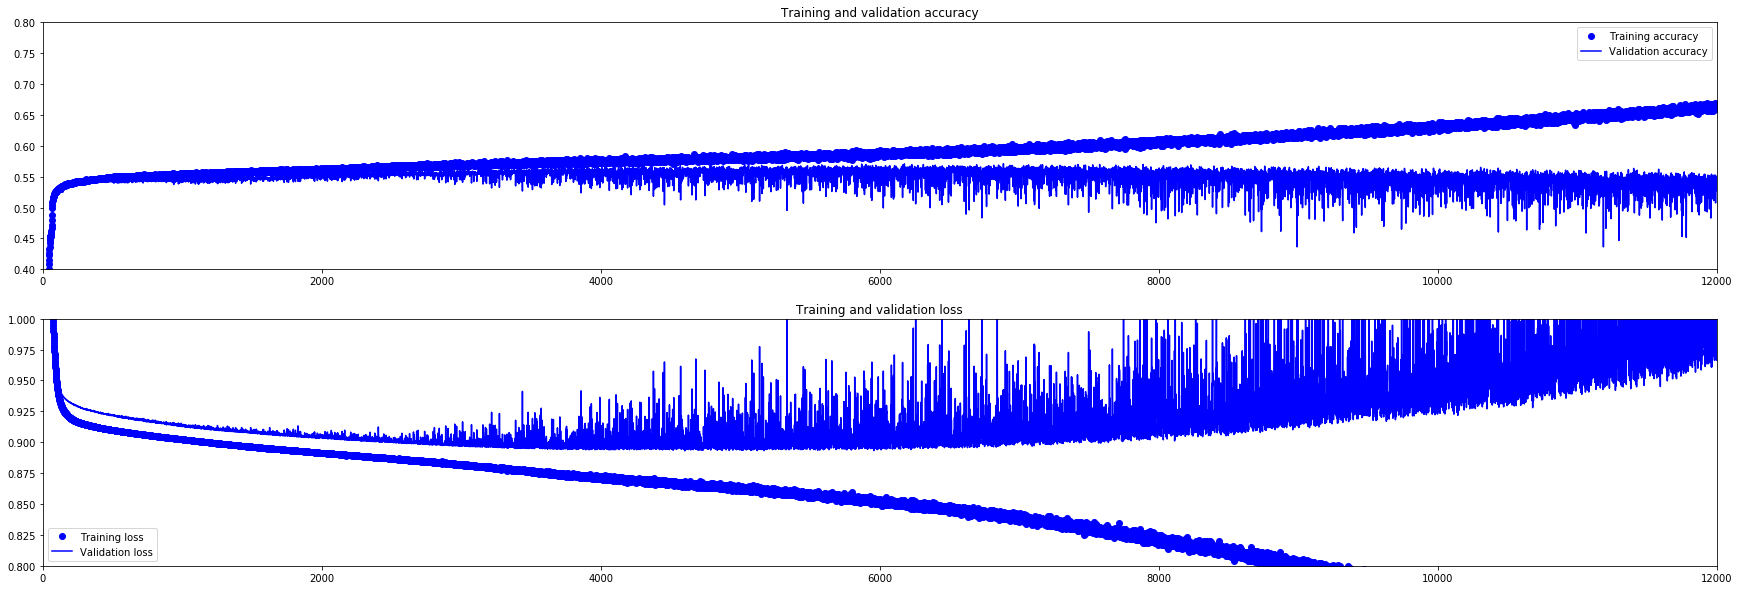

In [503]:
show_results(analysis,"FastText_MLP_12000_2")

In [105]:
batch_size  = 64
epochs      = 10
learning_rate = 0.0003
model = Sequential()

model.add(Conv1D(8, kernel_size=(3),activation='relu',padding='same'))
model.add(MaxPooling1D((4),padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(4, kernel_size=(3),activation='relu',padding='same'))
model.add(MaxPooling1D((2 ),padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


opt = keras.optimizers.RMSprop(lr=learning_rate)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [106]:
X_train.shape

(14000, 200)

In [107]:
X_train = np.expand_dims(X_train, axis=2)

In [108]:
X_train.shape

(14000, 200, 1)

In [109]:
X_valid.shape

(3000, 200)

In [110]:
X_valid = np.expand_dims(X_valid, axis=2)

In [111]:
X_valid.shape

(3000, 200, 1)

In [112]:
import time
start_time = time.time()
analysis = model.fit(X_train, y_train, batch_size=batch_size,epochs=1800,verbose=1,validation_data=(X_valid, y_valid))
trainTime = (time.time() - start_time)

Train on 14000 samples, validate on 3000 samples
Epoch 1/1800
14000/14000 [==============================] - 1s 94us/step - loss: 1.0310 - accuracy: 0.4532 - val_loss: 0.9841 - val_accuracy: 0.4997
Epoch 2/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9753 - accuracy: 0.4981 - val_loss: 0.9645 - val_accuracy: 0.5103
Epoch 3/1800
14000/14000 [==============================] - 1s 90us/step - loss: 0.9635 - accuracy: 0.5093 - val_loss: 0.9561 - val_accuracy: 0.5147
Epoch 4/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9547 - accuracy: 0.5177 - val_loss: 0.9501 - val_accuracy: 0.5230
Epoch 5/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9504 - accuracy: 0.5218 - val_loss: 0.9434 - val_accuracy: 0.5297
Epoch 6/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9480 - accuracy: 0.5254 - val_loss: 0.9414 - val_accuracy: 0.5330
Epoch 7/1800
14000/14000 [==============================]

14000/14000 [==============================] - 1s 84us/step - loss: 0.9219 - accuracy: 0.5385 - val_loss: 0.9256 - val_accuracy: 0.5320
Epoch 56/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9212 - accuracy: 0.5410 - val_loss: 0.9247 - val_accuracy: 0.5323
Epoch 57/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9210 - accuracy: 0.5382 - val_loss: 0.9252 - val_accuracy: 0.5340
Epoch 58/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9190 - accuracy: 0.5351 - val_loss: 0.9268 - val_accuracy: 0.5323
Epoch 59/1800
14000/14000 [==============================] - 1s 84us/step - loss: 0.9179 - accuracy: 0.5389 - val_loss: 0.9269 - val_accuracy: 0.5307
Epoch 60/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9197 - accuracy: 0.5376 - val_loss: 0.9291 - val_accuracy: 0.5317
Epoch 61/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9180 - accuracy: 0.5392 - val_

14000/14000 [==============================] - 1s 93us/step - loss: 0.9148 - accuracy: 0.5427 - val_loss: 0.9173 - val_accuracy: 0.5363
Epoch 110/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9177 - accuracy: 0.5380 - val_loss: 0.9201 - val_accuracy: 0.5347
Epoch 111/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9131 - accuracy: 0.5409 - val_loss: 0.9179 - val_accuracy: 0.5317
Epoch 112/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9141 - accuracy: 0.5456 - val_loss: 0.9172 - val_accuracy: 0.5330
Epoch 113/1800
14000/14000 [==============================] - 1s 87us/step - loss: 0.9145 - accuracy: 0.5452 - val_loss: 0.9183 - val_accuracy: 0.5310
Epoch 114/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9145 - accuracy: 0.5421 - val_loss: 0.9219 - val_accuracy: 0.5320
Epoch 115/1800
14000/14000 [==============================] - 1s 87us/step - loss: 0.9131 - accuracy: 0.5459 

14000/14000 [==============================] - 1s 82us/step - loss: 0.9135 - accuracy: 0.5432 - val_loss: 0.9177 - val_accuracy: 0.5357
Epoch 164/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9137 - accuracy: 0.5421 - val_loss: 0.9154 - val_accuracy: 0.5373
Epoch 165/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9108 - accuracy: 0.5431 - val_loss: 0.9173 - val_accuracy: 0.5333
Epoch 166/1800
14000/14000 [==============================] - 1s 90us/step - loss: 0.9138 - accuracy: 0.5410 - val_loss: 0.9185 - val_accuracy: 0.5367
Epoch 167/1800
14000/14000 [==============================] - 2s 157us/step - loss: 0.9129 - accuracy: 0.5446 - val_loss: 0.9177 - val_accuracy: 0.5353
Epoch 168/1800
14000/14000 [==============================] - 2s 109us/step - loss: 0.9123 - accuracy: 0.5428 - val_loss: 0.9191 - val_accuracy: 0.5300
Epoch 169/1800
14000/14000 [==============================] - 1s 90us/step - loss: 0.9133 - accuracy: 0.538

14000/14000 [==============================] - 1s 84us/step - loss: 0.9087 - accuracy: 0.5433 - val_loss: 0.9173 - val_accuracy: 0.5373
Epoch 218/1800
14000/14000 [==============================] - 1s 84us/step - loss: 0.9099 - accuracy: 0.5428 - val_loss: 0.9148 - val_accuracy: 0.5333
Epoch 219/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9109 - accuracy: 0.5447 - val_loss: 0.9164 - val_accuracy: 0.5327
Epoch 220/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9087 - accuracy: 0.5466 - val_loss: 0.9161 - val_accuracy: 0.5390
Epoch 221/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9107 - accuracy: 0.5424 - val_loss: 0.9152 - val_accuracy: 0.5357
Epoch 222/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9100 - accuracy: 0.5467 - val_loss: 0.9151 - val_accuracy: 0.5327
Epoch 223/1800
14000/14000 [==============================] - 1s 87us/step - loss: 0.9112 - accuracy: 0.5414 

14000/14000 [==============================] - 1s 87us/step - loss: 0.9093 - accuracy: 0.5469 - val_loss: 0.9138 - val_accuracy: 0.5297
Epoch 272/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9070 - accuracy: 0.5481 - val_loss: 0.9168 - val_accuracy: 0.5377
Epoch 273/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9118 - accuracy: 0.5428 - val_loss: 0.9150 - val_accuracy: 0.5367
Epoch 274/1800
14000/14000 [==============================] - 1s 90us/step - loss: 0.9109 - accuracy: 0.5477 - val_loss: 0.9140 - val_accuracy: 0.5350
Epoch 275/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9098 - accuracy: 0.5452 - val_loss: 0.9177 - val_accuracy: 0.5340
Epoch 276/1800
14000/14000 [==============================] - 1s 90us/step - loss: 0.9082 - accuracy: 0.5481 - val_loss: 0.9131 - val_accuracy: 0.5377
Epoch 277/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9092 - accuracy: 0.5436 

14000/14000 [==============================] - 1s 86us/step - loss: 0.9082 - accuracy: 0.5469 - val_loss: 0.9139 - val_accuracy: 0.5350
Epoch 326/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9096 - accuracy: 0.5479 - val_loss: 0.9143 - val_accuracy: 0.5333
Epoch 327/1800
14000/14000 [==============================] - 1s 100us/step - loss: 0.9086 - accuracy: 0.5496 - val_loss: 0.9154 - val_accuracy: 0.5383
Epoch 328/1800
14000/14000 [==============================] - 1s 96us/step - loss: 0.9070 - accuracy: 0.5482 - val_loss: 0.9140 - val_accuracy: 0.5363
Epoch 329/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9072 - accuracy: 0.5490 - val_loss: 0.9149 - val_accuracy: 0.5357
Epoch 330/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9083 - accuracy: 0.5464 - val_loss: 0.9145 - val_accuracy: 0.5397
Epoch 331/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9089 - accuracy: 0.5449

14000/14000 [==============================] - 1s 82us/step - loss: 0.9080 - accuracy: 0.5446 - val_loss: 0.9132 - val_accuracy: 0.5377
Epoch 380/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9084 - accuracy: 0.5491 - val_loss: 0.9140 - val_accuracy: 0.5337
Epoch 381/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9086 - accuracy: 0.5476 - val_loss: 0.9143 - val_accuracy: 0.5387
Epoch 382/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9069 - accuracy: 0.5466 - val_loss: 0.9150 - val_accuracy: 0.5323
Epoch 383/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9081 - accuracy: 0.5483 - val_loss: 0.9152 - val_accuracy: 0.5413
Epoch 384/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9071 - accuracy: 0.5474 - val_loss: 0.9122 - val_accuracy: 0.5353
Epoch 385/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9082 - accuracy: 0.5471 

14000/14000 [==============================] - 1s 86us/step - loss: 0.9080 - accuracy: 0.5460 - val_loss: 0.9143 - val_accuracy: 0.5420
Epoch 434/1800
14000/14000 [==============================] - 1s 84us/step - loss: 0.9085 - accuracy: 0.5421 - val_loss: 0.9130 - val_accuracy: 0.5407
Epoch 435/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9069 - accuracy: 0.5466 - val_loss: 0.9138 - val_accuracy: 0.5383
Epoch 436/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9082 - accuracy: 0.5484 - val_loss: 0.9152 - val_accuracy: 0.5400
Epoch 437/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9045 - accuracy: 0.5503 - val_loss: 0.9122 - val_accuracy: 0.5407
Epoch 438/1800
14000/14000 [==============================] - 1s 84us/step - loss: 0.9058 - accuracy: 0.5492 - val_loss: 0.9140 - val_accuracy: 0.5363
Epoch 439/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9077 - accuracy: 0.5482 

14000/14000 [==============================] - 1s 85us/step - loss: 0.9076 - accuracy: 0.5456 - val_loss: 0.9159 - val_accuracy: 0.5383
Epoch 488/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9094 - accuracy: 0.5476 - val_loss: 0.9135 - val_accuracy: 0.5393
Epoch 489/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9074 - accuracy: 0.5499 - val_loss: 0.9137 - val_accuracy: 0.5377
Epoch 490/1800
14000/14000 [==============================] - 1s 90us/step - loss: 0.9062 - accuracy: 0.5475 - val_loss: 0.9132 - val_accuracy: 0.5393
Epoch 491/1800
14000/14000 [==============================] - 1s 90us/step - loss: 0.9055 - accuracy: 0.5469 - val_loss: 0.9130 - val_accuracy: 0.5407
Epoch 492/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9038 - accuracy: 0.5494 - val_loss: 0.9131 - val_accuracy: 0.5397
Epoch 493/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9068 - accuracy: 0.5459 

14000/14000 [==============================] - 1s 81us/step - loss: 0.9045 - accuracy: 0.5479 - val_loss: 0.9118 - val_accuracy: 0.5457
Epoch 542/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9056 - accuracy: 0.5466 - val_loss: 0.9127 - val_accuracy: 0.5443
Epoch 543/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9045 - accuracy: 0.5493 - val_loss: 0.9127 - val_accuracy: 0.5457
Epoch 544/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9060 - accuracy: 0.5499 - val_loss: 0.9110 - val_accuracy: 0.5467
Epoch 545/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9047 - accuracy: 0.5496 - val_loss: 0.9145 - val_accuracy: 0.5433
Epoch 546/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9065 - accuracy: 0.5479 - val_loss: 0.9120 - val_accuracy: 0.5400
Epoch 547/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9062 - accuracy: 0.5452 

14000/14000 [==============================] - 1s 86us/step - loss: 0.9036 - accuracy: 0.5466 - val_loss: 0.9148 - val_accuracy: 0.5347
Epoch 596/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9067 - accuracy: 0.5455 - val_loss: 0.9167 - val_accuracy: 0.5397
Epoch 597/1800
14000/14000 [==============================] - 1s 93us/step - loss: 0.9075 - accuracy: 0.5481 - val_loss: 0.9178 - val_accuracy: 0.5420
Epoch 598/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9045 - accuracy: 0.5501 - val_loss: 0.9139 - val_accuracy: 0.5443
Epoch 599/1800
14000/14000 [==============================] - 1s 90us/step - loss: 0.9041 - accuracy: 0.5473 - val_loss: 0.9148 - val_accuracy: 0.5457
Epoch 600/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9039 - accuracy: 0.5501 - val_loss: 0.9136 - val_accuracy: 0.5390
Epoch 601/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9068 - accuracy: 0.5467 

14000/14000 [==============================] - 1s 87us/step - loss: 0.9043 - accuracy: 0.5479 - val_loss: 0.9153 - val_accuracy: 0.5450
Epoch 650/1800
14000/14000 [==============================] - 1s 87us/step - loss: 0.9064 - accuracy: 0.5453 - val_loss: 0.9144 - val_accuracy: 0.5410
Epoch 651/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9073 - accuracy: 0.5459 - val_loss: 0.9115 - val_accuracy: 0.5457
Epoch 652/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9043 - accuracy: 0.5493 - val_loss: 0.9161 - val_accuracy: 0.5400
Epoch 653/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9056 - accuracy: 0.5485 - val_loss: 0.9119 - val_accuracy: 0.5463
Epoch 654/1800
14000/14000 [==============================] - 1s 87us/step - loss: 0.9055 - accuracy: 0.5440 - val_loss: 0.9143 - val_accuracy: 0.5457
Epoch 655/1800
14000/14000 [==============================] - 1s 84us/step - loss: 0.9058 - accuracy: 0.5499 

14000/14000 [==============================] - 1s 84us/step - loss: 0.9058 - accuracy: 0.5508 - val_loss: 0.9128 - val_accuracy: 0.5460
Epoch 704/1800
14000/14000 [==============================] - 1s 84us/step - loss: 0.9057 - accuracy: 0.5481 - val_loss: 0.9113 - val_accuracy: 0.5393
Epoch 705/1800
14000/14000 [==============================] - 1s 84us/step - loss: 0.9068 - accuracy: 0.5469 - val_loss: 0.9155 - val_accuracy: 0.5433
Epoch 706/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9049 - accuracy: 0.5514 - val_loss: 0.9107 - val_accuracy: 0.5423
Epoch 707/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9058 - accuracy: 0.5490 - val_loss: 0.9122 - val_accuracy: 0.5477
Epoch 708/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9046 - accuracy: 0.5491 - val_loss: 0.9119 - val_accuracy: 0.5477
Epoch 709/1800
14000/14000 [==============================] - 1s 88us/step - loss: 0.9057 - accuracy: 0.5494 

14000/14000 [==============================] - 1s 82us/step - loss: 0.9055 - accuracy: 0.5486 - val_loss: 0.9116 - val_accuracy: 0.5443
Epoch 758/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9053 - accuracy: 0.5446 - val_loss: 0.9136 - val_accuracy: 0.5477
Epoch 759/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9043 - accuracy: 0.5451 - val_loss: 0.9146 - val_accuracy: 0.5417
Epoch 760/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9041 - accuracy: 0.5543 - val_loss: 0.9141 - val_accuracy: 0.5453
Epoch 761/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9057 - accuracy: 0.5519 - val_loss: 0.9131 - val_accuracy: 0.5387
Epoch 762/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9042 - accuracy: 0.5528 - val_loss: 0.9130 - val_accuracy: 0.5433
Epoch 763/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9062 - accuracy: 0.5488 

14000/14000 [==============================] - 1s 81us/step - loss: 0.9057 - accuracy: 0.5481 - val_loss: 0.9118 - val_accuracy: 0.5403
Epoch 812/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9042 - accuracy: 0.5520 - val_loss: 0.9120 - val_accuracy: 0.5383
Epoch 813/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9041 - accuracy: 0.5495 - val_loss: 0.9136 - val_accuracy: 0.5377
Epoch 814/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9050 - accuracy: 0.5470 - val_loss: 0.9146 - val_accuracy: 0.5360
Epoch 815/1800
14000/14000 [==============================] - 1s 80us/step - loss: 0.9055 - accuracy: 0.5457 - val_loss: 0.9129 - val_accuracy: 0.5370
Epoch 816/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9032 - accuracy: 0.5500 - val_loss: 0.9114 - val_accuracy: 0.5463
Epoch 817/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9054 - accuracy: 0.5475 

14000/14000 [==============================] - 1s 81us/step - loss: 0.9043 - accuracy: 0.5476 - val_loss: 0.9184 - val_accuracy: 0.5440
Epoch 866/1800
14000/14000 [==============================] - 1s 88us/step - loss: 0.9045 - accuracy: 0.5499 - val_loss: 0.9120 - val_accuracy: 0.5520
Epoch 867/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9055 - accuracy: 0.5515 - val_loss: 0.9125 - val_accuracy: 0.5437
Epoch 868/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9067 - accuracy: 0.5439 - val_loss: 0.9142 - val_accuracy: 0.5383
Epoch 869/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9035 - accuracy: 0.5493 - val_loss: 0.9140 - val_accuracy: 0.5477
Epoch 870/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9035 - accuracy: 0.5471 - val_loss: 0.9122 - val_accuracy: 0.5480
Epoch 871/1800
14000/14000 [==============================] - 1s 87us/step - loss: 0.9064 - accuracy: 0.5467 

14000/14000 [==============================] - 1s 98us/step - loss: 0.9039 - accuracy: 0.5457 - val_loss: 0.9115 - val_accuracy: 0.5410
Epoch 920/1800
14000/14000 [==============================] - 1s 98us/step - loss: 0.9041 - accuracy: 0.5501 - val_loss: 0.9154 - val_accuracy: 0.5427
Epoch 921/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9031 - accuracy: 0.5533 - val_loss: 0.9121 - val_accuracy: 0.5410
Epoch 922/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9058 - accuracy: 0.5505 - val_loss: 0.9157 - val_accuracy: 0.5393
Epoch 923/1800
14000/14000 [==============================] - 1s 84us/step - loss: 0.9025 - accuracy: 0.5491 - val_loss: 0.9111 - val_accuracy: 0.5430
Epoch 924/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9054 - accuracy: 0.5481 - val_loss: 0.9158 - val_accuracy: 0.5357
Epoch 925/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9036 - accuracy: 0.5458 

14000/14000 [==============================] - 1s 88us/step - loss: 0.9055 - accuracy: 0.5433 - val_loss: 0.9105 - val_accuracy: 0.5437
Epoch 974/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9052 - accuracy: 0.5490 - val_loss: 0.9111 - val_accuracy: 0.5440
Epoch 975/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9047 - accuracy: 0.5475 - val_loss: 0.9104 - val_accuracy: 0.5427
Epoch 976/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9046 - accuracy: 0.5507 - val_loss: 0.9106 - val_accuracy: 0.5427
Epoch 977/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9057 - accuracy: 0.5499 - val_loss: 0.9138 - val_accuracy: 0.5367
Epoch 978/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9048 - accuracy: 0.5514 - val_loss: 0.9119 - val_accuracy: 0.5427
Epoch 979/1800
14000/14000 [==============================] - 1s 94us/step - loss: 0.9061 - accuracy: 0.5494 

Epoch 1027/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9050 - accuracy: 0.5474 - val_loss: 0.9113 - val_accuracy: 0.5467
Epoch 1028/1800
14000/14000 [==============================] - 1s 87us/step - loss: 0.9048 - accuracy: 0.5499 - val_loss: 0.9128 - val_accuracy: 0.5433
Epoch 1029/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9056 - accuracy: 0.5495 - val_loss: 0.9108 - val_accuracy: 0.5453
Epoch 1030/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9038 - accuracy: 0.5499 - val_loss: 0.9113 - val_accuracy: 0.5483
Epoch 1031/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9043 - accuracy: 0.5509 - val_loss: 0.9121 - val_accuracy: 0.5490
Epoch 1032/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9023 - accuracy: 0.5510 - val_loss: 0.9114 - val_accuracy: 0.5473
Epoch 1033/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.90

Epoch 1081/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9051 - accuracy: 0.5517 - val_loss: 0.9137 - val_accuracy: 0.5370
Epoch 1082/1800
14000/14000 [==============================] - 1s 96us/step - loss: 0.9036 - accuracy: 0.5449 - val_loss: 0.9116 - val_accuracy: 0.5423
Epoch 1083/1800
14000/14000 [==============================] - 1s 96us/step - loss: 0.9047 - accuracy: 0.5500 - val_loss: 0.9153 - val_accuracy: 0.5450
Epoch 1084/1800
14000/14000 [==============================] - 1s 88us/step - loss: 0.9049 - accuracy: 0.5474 - val_loss: 0.9170 - val_accuracy: 0.5403
Epoch 1085/1800
14000/14000 [==============================] - 1s 95us/step - loss: 0.9057 - accuracy: 0.5496 - val_loss: 0.9147 - val_accuracy: 0.5410
Epoch 1086/1800
14000/14000 [==============================] - 1s 97us/step - loss: 0.9066 - accuracy: 0.5478 - val_loss: 0.9132 - val_accuracy: 0.5467
Epoch 1087/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.90

Epoch 1135/1800
14000/14000 [==============================] - 1s 99us/step - loss: 0.9046 - accuracy: 0.5481 - val_loss: 0.9105 - val_accuracy: 0.5463
Epoch 1136/1800
14000/14000 [==============================] - 1s 93us/step - loss: 0.9050 - accuracy: 0.5480 - val_loss: 0.9112 - val_accuracy: 0.5413
Epoch 1137/1800
14000/14000 [==============================] - 1s 101us/step - loss: 0.9048 - accuracy: 0.5487 - val_loss: 0.9104 - val_accuracy: 0.5453
Epoch 1138/1800
14000/14000 [==============================] - 1s 93us/step - loss: 0.9039 - accuracy: 0.5536 - val_loss: 0.9101 - val_accuracy: 0.5493
Epoch 1139/1800
14000/14000 [==============================] - 1s 99us/step - loss: 0.9061 - accuracy: 0.5491 - val_loss: 0.9123 - val_accuracy: 0.5457
Epoch 1140/1800
14000/14000 [==============================] - 1s 93us/step - loss: 0.9037 - accuracy: 0.5491 - val_loss: 0.9098 - val_accuracy: 0.5407
Epoch 1141/1800
14000/14000 [==============================] - 1s 102us/step - loss: 0.

Epoch 1189/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9033 - accuracy: 0.5514 - val_loss: 0.9138 - val_accuracy: 0.5433
Epoch 1190/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9050 - accuracy: 0.5466 - val_loss: 0.9102 - val_accuracy: 0.5443
Epoch 1191/1800
14000/14000 [==============================] - 1s 90us/step - loss: 0.9066 - accuracy: 0.5502 - val_loss: 0.9141 - val_accuracy: 0.5437
Epoch 1192/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9054 - accuracy: 0.5519 - val_loss: 0.9135 - val_accuracy: 0.5397
Epoch 1193/1800
14000/14000 [==============================] - 1s 87us/step - loss: 0.9052 - accuracy: 0.5491 - val_loss: 0.9101 - val_accuracy: 0.5483
Epoch 1194/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9030 - accuracy: 0.5516 - val_loss: 0.9145 - val_accuracy: 0.5420
Epoch 1195/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.90

Epoch 1243/1800
14000/14000 [==============================] - 1s 88us/step - loss: 0.9046 - accuracy: 0.5493 - val_loss: 0.9129 - val_accuracy: 0.5467
Epoch 1244/1800
14000/14000 [==============================] - 1s 90us/step - loss: 0.9039 - accuracy: 0.5459 - val_loss: 0.9146 - val_accuracy: 0.5383
Epoch 1245/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9051 - accuracy: 0.5501 - val_loss: 0.9158 - val_accuracy: 0.5420
Epoch 1246/1800
14000/14000 [==============================] - 1s 90us/step - loss: 0.9066 - accuracy: 0.5476 - val_loss: 0.9110 - val_accuracy: 0.5393
Epoch 1247/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9026 - accuracy: 0.5519 - val_loss: 0.9095 - val_accuracy: 0.5460
Epoch 1248/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9070 - accuracy: 0.5442 - val_loss: 0.9112 - val_accuracy: 0.5473
Epoch 1249/1800
14000/14000 [==============================] - 1s 106us/step - loss: 0.9

Epoch 1297/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9021 - accuracy: 0.5506 - val_loss: 0.9111 - val_accuracy: 0.5407
Epoch 1298/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9058 - accuracy: 0.5510 - val_loss: 0.9123 - val_accuracy: 0.5417
Epoch 1299/1800
14000/14000 [==============================] - 1s 80us/step - loss: 0.9058 - accuracy: 0.5463 - val_loss: 0.9112 - val_accuracy: 0.5423
Epoch 1300/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9069 - accuracy: 0.5491 - val_loss: 0.9140 - val_accuracy: 0.5433
Epoch 1301/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9051 - accuracy: 0.5484 - val_loss: 0.9165 - val_accuracy: 0.5437
Epoch 1302/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9055 - accuracy: 0.5503 - val_loss: 0.9155 - val_accuracy: 0.5413
Epoch 1303/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.90

Epoch 1351/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9055 - accuracy: 0.5466 - val_loss: 0.9140 - val_accuracy: 0.5397
Epoch 1352/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9072 - accuracy: 0.5489 - val_loss: 0.9155 - val_accuracy: 0.5347
Epoch 1353/1800
14000/14000 [==============================] - 1s 84us/step - loss: 0.9070 - accuracy: 0.5471 - val_loss: 0.9124 - val_accuracy: 0.5470
Epoch 1354/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9037 - accuracy: 0.5528 - val_loss: 0.9130 - val_accuracy: 0.5410
Epoch 1355/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9040 - accuracy: 0.5539 - val_loss: 0.9143 - val_accuracy: 0.5397
Epoch 1356/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9056 - accuracy: 0.5459 - val_loss: 0.9131 - val_accuracy: 0.5420
Epoch 1357/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.90

14000/14000 [==============================] - 1s 86us/step - loss: 0.9039 - accuracy: 0.5511 - val_loss: 0.9117 - val_accuracy: 0.5373
Epoch 1405/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9032 - accuracy: 0.5483 - val_loss: 0.9181 - val_accuracy: 0.5363
Epoch 1406/1800
14000/14000 [==============================] - 1s 99us/step - loss: 0.9068 - accuracy: 0.5482 - val_loss: 0.9118 - val_accuracy: 0.5397
Epoch 1407/1800
14000/14000 [==============================] - 1s 88us/step - loss: 0.9054 - accuracy: 0.5471 - val_loss: 0.9123 - val_accuracy: 0.5430
Epoch 1408/1800
14000/14000 [==============================] - 1s 93us/step - loss: 0.9041 - accuracy: 0.5479 - val_loss: 0.9185 - val_accuracy: 0.5350
Epoch 1409/1800
14000/14000 [==============================] - 2s 114us/step - loss: 0.9057 - accuracy: 0.5494 - val_loss: 0.9129 - val_accuracy: 0.5417
Epoch 1410/1800
14000/14000 [==============================] - 1s 98us/step - loss: 0.9065 - accuracy: 

Epoch 1458/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9062 - accuracy: 0.5437 - val_loss: 0.9117 - val_accuracy: 0.5400
Epoch 1459/1800
14000/14000 [==============================] - 1s 95us/step - loss: 0.9052 - accuracy: 0.5440 - val_loss: 0.9159 - val_accuracy: 0.5400
Epoch 1460/1800
14000/14000 [==============================] - 1s 84us/step - loss: 0.9051 - accuracy: 0.5479 - val_loss: 0.9125 - val_accuracy: 0.5447
Epoch 1461/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9087 - accuracy: 0.5491 - val_loss: 0.9154 - val_accuracy: 0.5457
Epoch 1462/1800
14000/14000 [==============================] - 1s 99us/step - loss: 0.9048 - accuracy: 0.5516 - val_loss: 0.9151 - val_accuracy: 0.5390
Epoch 1463/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.9052 - accuracy: 0.5469 - val_loss: 0.9171 - val_accuracy: 0.5400
Epoch 1464/1800
14000/14000 [==============================] - 1s 87us/step - loss: 0.90

Epoch 1512/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9056 - accuracy: 0.5521 - val_loss: 0.9150 - val_accuracy: 0.5387
Epoch 1513/1800
14000/14000 [==============================] - 1s 97us/step - loss: 0.9047 - accuracy: 0.5494 - val_loss: 0.9139 - val_accuracy: 0.5387
Epoch 1514/1800
14000/14000 [==============================] - 1s 107us/step - loss: 0.9065 - accuracy: 0.5466 - val_loss: 0.9167 - val_accuracy: 0.5387
Epoch 1515/1800
14000/14000 [==============================] - 1s 97us/step - loss: 0.9037 - accuracy: 0.5526 - val_loss: 0.9115 - val_accuracy: 0.5457
Epoch 1516/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9042 - accuracy: 0.5493 - val_loss: 0.9142 - val_accuracy: 0.5347
Epoch 1517/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9083 - accuracy: 0.5461 - val_loss: 0.9106 - val_accuracy: 0.5430
Epoch 1518/1800
14000/14000 [==============================] - 1s 93us/step - loss: 0.9

Epoch 1566/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9065 - accuracy: 0.5476 - val_loss: 0.9117 - val_accuracy: 0.5443
Epoch 1567/1800
14000/14000 [==============================] - 2s 109us/step - loss: 0.9042 - accuracy: 0.5481 - val_loss: 0.9171 - val_accuracy: 0.5363
Epoch 1568/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9040 - accuracy: 0.5460 - val_loss: 0.9166 - val_accuracy: 0.5370
Epoch 1569/1800
14000/14000 [==============================] - 1s 85us/step - loss: 0.9061 - accuracy: 0.5461 - val_loss: 0.9155 - val_accuracy: 0.5387
Epoch 1570/1800
14000/14000 [==============================] - 1s 92us/step - loss: 0.9051 - accuracy: 0.5464 - val_loss: 0.9154 - val_accuracy: 0.5347
Epoch 1571/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9056 - accuracy: 0.5455 - val_loss: 0.9120 - val_accuracy: 0.5400
Epoch 1572/1800
14000/14000 [==============================] - 1s 88us/step - loss: 0.9

Epoch 1620/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9042 - accuracy: 0.5498 - val_loss: 0.9116 - val_accuracy: 0.5497
Epoch 1621/1800
14000/14000 [==============================] - 1s 97us/step - loss: 0.9064 - accuracy: 0.5512 - val_loss: 0.9144 - val_accuracy: 0.5423
Epoch 1622/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9061 - accuracy: 0.5496 - val_loss: 0.9094 - val_accuracy: 0.5470
Epoch 1623/1800
14000/14000 [==============================] - 4s 295us/step - loss: 0.9060 - accuracy: 0.5484 - val_loss: 0.9116 - val_accuracy: 0.5427
Epoch 1624/1800
14000/14000 [==============================] - 3s 200us/step - loss: 0.9045 - accuracy: 0.5471 - val_loss: 0.9157 - val_accuracy: 0.5400
Epoch 1625/1800
14000/14000 [==============================] - 2s 120us/step - loss: 0.9075 - accuracy: 0.5469 - val_loss: 0.9148 - val_accuracy: 0.5410
Epoch 1626/1800
14000/14000 [==============================] - 1s 95us/step - loss: 0

Epoch 1674/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9059 - accuracy: 0.5462 - val_loss: 0.9141 - val_accuracy: 0.5433
Epoch 1675/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9051 - accuracy: 0.5484 - val_loss: 0.9135 - val_accuracy: 0.5423
Epoch 1676/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9088 - accuracy: 0.5473 - val_loss: 0.9141 - val_accuracy: 0.5427
Epoch 1677/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9061 - accuracy: 0.5476 - val_loss: 0.9118 - val_accuracy: 0.5460
Epoch 1678/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9074 - accuracy: 0.5491 - val_loss: 0.9132 - val_accuracy: 0.5390
Epoch 1679/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9074 - accuracy: 0.5472 - val_loss: 0.9129 - val_accuracy: 0.5463
Epoch 1680/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.90

Epoch 1728/1800
14000/14000 [==============================] - 1s 94us/step - loss: 0.9070 - accuracy: 0.5481 - val_loss: 0.9193 - val_accuracy: 0.5387
Epoch 1729/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9065 - accuracy: 0.5425 - val_loss: 0.9153 - val_accuracy: 0.5403
Epoch 1730/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9076 - accuracy: 0.5467 - val_loss: 0.9210 - val_accuracy: 0.5337
Epoch 1731/1800
14000/14000 [==============================] - 1s 89us/step - loss: 0.9073 - accuracy: 0.5459 - val_loss: 0.9133 - val_accuracy: 0.5440
Epoch 1732/1800
14000/14000 [==============================] - 1s 91us/step - loss: 0.9044 - accuracy: 0.5481 - val_loss: 0.9128 - val_accuracy: 0.5427
Epoch 1733/1800
14000/14000 [==============================] - 1s 86us/step - loss: 0.9056 - accuracy: 0.5504 - val_loss: 0.9156 - val_accuracy: 0.5397
Epoch 1734/1800
14000/14000 [==============================] - 1s 93us/step - loss: 0.90

Epoch 1782/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9058 - accuracy: 0.5441 - val_loss: 0.9117 - val_accuracy: 0.5430
Epoch 1783/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9044 - accuracy: 0.5479 - val_loss: 0.9154 - val_accuracy: 0.5417
Epoch 1784/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9077 - accuracy: 0.5473 - val_loss: 0.9132 - val_accuracy: 0.5443
Epoch 1785/1800
14000/14000 [==============================] - 1s 82us/step - loss: 0.9055 - accuracy: 0.5482 - val_loss: 0.9105 - val_accuracy: 0.5370
Epoch 1786/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9063 - accuracy: 0.5439 - val_loss: 0.9130 - val_accuracy: 0.5393
Epoch 1787/1800
14000/14000 [==============================] - 1s 81us/step - loss: 0.9038 - accuracy: 0.5492 - val_loss: 0.9172 - val_accuracy: 0.5367
Epoch 1788/1800
14000/14000 [==============================] - 1s 83us/step - loss: 0.90

In [113]:
print(trainTime/60, " minutes")

37.46905460357666  minutes


In [114]:
X_test = np.expand_dims(X_test, axis=2)

In [115]:
test_eval = model.evaluate(X_test, y_test, verbose=0)

In [116]:
print('Test loss:', test_eval[0])      # this is the categorical_crossentropy
print('Test accuracy:', test_eval[1])

Test loss: 0.8638582332928976
Test accuracy: 0.5913333296775818


In [117]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1) # Choose the prediction with the highest probability
y_pred_one_hot = to_categorical(y_pred)
print("F1-Score = ", f1_score(y_test, y_pred_one_hot, average='macro'))

F1-Score =  0.43255081754534436


<Figure size 432x288 with 0 Axes>

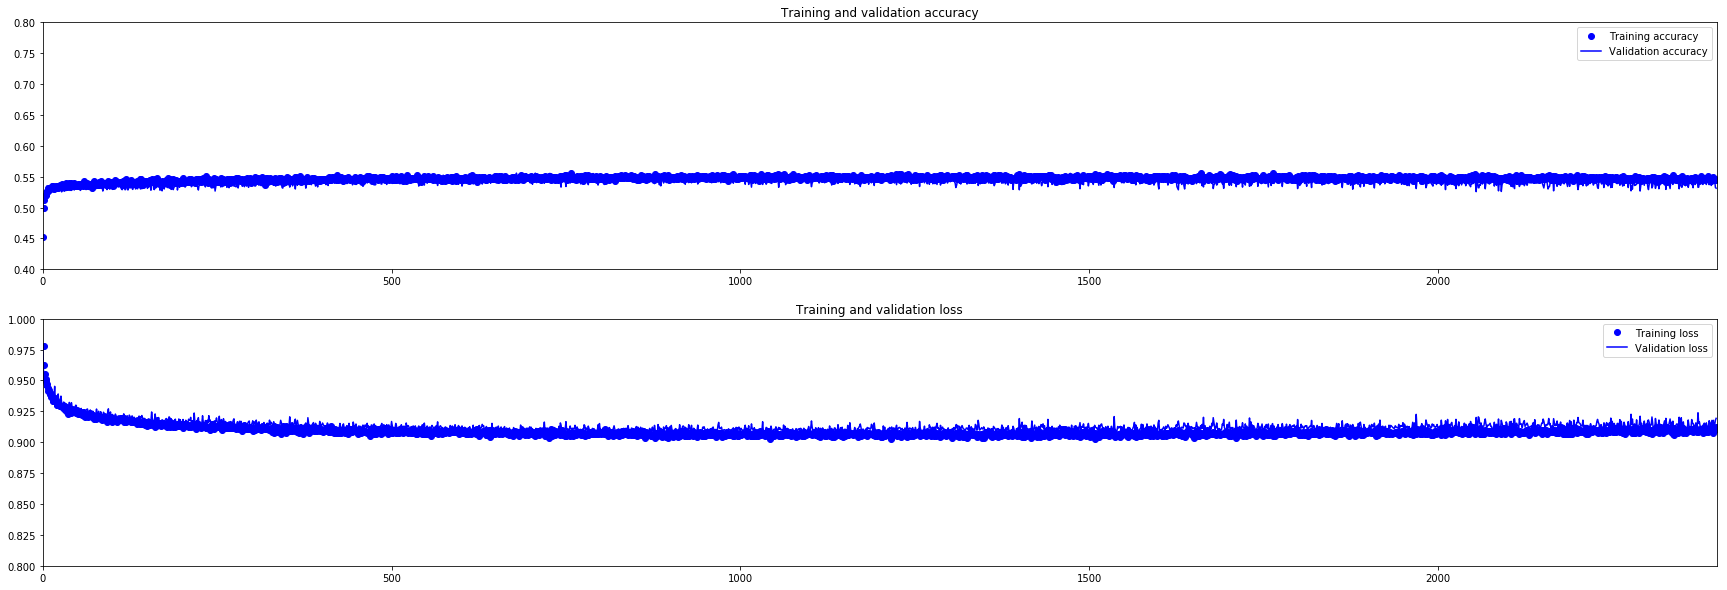

In [481]:
show_results(analysis,"fasttext_CNN_2400")

# Glove

In [ ]:
from glove import Corpus, Glove
corpus = Corpus() 
glove_data = list(tokenized_tweet)
corpus.fit(glove_data, window=10)
glove = Glove(no_components=5, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=30, no_threads=1, verbose=True)


# Doc2Vec

In [118]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
import nltk

In [119]:
corpus = [list(nltk.word_tokenize(doc)) for doc in df['Tweet']]

In [120]:
corpus = [
    TaggedDocument(words, ['d{}'.format(idx)])
    for idx, words in enumerate(corpus)
]

In [121]:
model = Doc2Vec(corpus, size=200, min_count=0)

/Users/gaurav/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [122]:
print(len(model.docvecs))

20000


In [123]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_valid, y_train, y_valid  = train_test_split(
        model.docvecs, 
        sentiment,
        train_size=0.85, 
        shuffle = False
       )

In [124]:
print(len(X_train))
# print(len(X_test))
print(len(X_valid))

17000
3000


In [125]:
from sklearn.model_selection import train_test_split
sentiment = df['Sentiment Polarity']
X_train, X_test, y_train, y_test  = train_test_split(
        X_train, 
        y_train,
        train_size=0.82352942, 
        shuffle = False
       )

In [126]:
print(len(X_train))
print(len(X_test))
print(len(X_valid))

14000
3000
3000


In [128]:
from sklearn import svm
lin_clf = svm.SVC(kernel='linear',decision_function_shape='ovr', class_weight='balanced',random_state=0)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.536
F1-Score =  0.5276445713091461
[[660 167  73]
 [503 317 280]
 [168 201 631]]


In [129]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dtree_model.fit(X_train, y_train) 
y_pred = dtree_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.44466666666666665
F1-Score =  0.44523749815667407
[[394 309 197]
 [344 461 295]
 [197 324 479]]


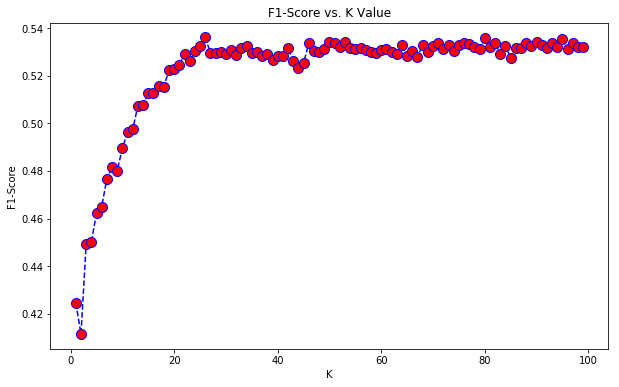

Best K value =  26


In [130]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
# Will take some time
best_k = 0
k=0
for i in range(1,100):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 f=f1_score(y_test, pred_i, average='macro')
 if f>best_k:
        best_k = f
        k=i
 error_rate.append(f)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.savefig('/Users/gaurav/Desktop/Hinglish/data/k/k_ex6-doc2vec-1.png', bbox_inches='tight')
plt.show()
print("Best K value = ",k)

In [131]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
clf = knn.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5306666666666666
F1-Score =  0.5360376649309543
[[535 297  68]
 [378 516 206]
 [118 341 541]]


In [132]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.49833333333333335
F1-Score =  0.48059343256631576
[[742 108  50]
 [673 226 201]
 [295 178 527]]


In [133]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
y_pred = MNB.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

ValueError: Input X must be non-negative

In [134]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, class_weight='balanced')
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score =  0.531
F1-Score =  0.522934425433744
[[572 230  98]
 [411 324 365]
 [125 178 697]]


In [135]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')
import time
start_time=time.time()
model.fit(X_train, y_train) 
duration = time.time()-start_time
print(duration/60, " minutes")
y_pred = model.predict(X_test)
print("Accuracy Score = ", accuracy_score(y_test, y_pred))
print("F1-Score = ", f1_score(y_test, y_pred, average='macro'))
print(confusion_matrix(y_test, y_pred))

2.969930366675059  minutes
Accuracy Score =  0.5346666666666666
F1-Score =  0.5403893532185551
[[501 335  64]
 [334 532 234]
 [ 93 336 571]]
